# SETUP AND IMPORT LIBRARY

In [2]:
import pandas as pd

In [2]:
data_gabungan = pd.read_csv('DATA WISATA GABUNGAN (23.842).csv')

In [3]:
data_gabungan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23842 entries, 0 to 23841
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   User     23842 non-null  object
 1   Comment  23842 non-null  object
 2   Rating   23842 non-null  object
dtypes: object(3)
memory usage: 558.9+ KB


In [4]:
data_gabungan.head()

User                                            Comment  \
0      Cbro Tarigan  I love all beach at Nusa Penida\n\nSalah satu ...   
1       M Ilhamsyah  Tiket:\nHarga tiket masuk sebesar Rp. 35.000 m...   
2     Andry Pebadja  (+) Terletak di wilayah timur Nusa Penida, Dia...   
3    Hendra Wahyudi  Akses menuju pantai ini berliku-liku, penuh ta...   
4  yudiyani saputri  Sampai sini pas diatas jam 12 Siang. Panas bgt...   

      Rating  
0  5 bintang  
1  5 bintang  
2  5 bintang  
3  5 bintang  
4  5 bintang

In [5]:
# Fungsi untuk mengonversi rating dari string ke integer
def konversi_rating(rating_str):
    return int(rating_str.split()[0])

# Mengonversi kolom Rating
data_gabungan['Rating'] = data_gabungan['Rating'].apply(konversi_rating)

# Fungsi untuk memberikan label berdasarkan rating
def beri_label(rating):
    if rating in [1, 2]:
        return 'Negatif'
    elif rating == 3:
        return 'Netral'
    elif rating in [4, 5]:
        return 'Positif'

# Menambahkan kolom Label
data_gabungan['Label'] = data_gabungan['Rating'].apply(beri_label)

In [6]:
data_gabungan = data_gabungan[['Label', 'Comment', 'Rating']]

In [7]:
data_gabungan.head()

Label                                            Comment  Rating
0  Positif  I love all beach at Nusa Penida\n\nSalah satu ...       5
1  Positif  Tiket:\nHarga tiket masuk sebesar Rp. 35.000 m...       5
2  Positif  (+) Terletak di wilayah timur Nusa Penida, Dia...       5
3  Positif  Akses menuju pantai ini berliku-liku, penuh ta...       5
4  Positif  Sampai sini pas diatas jam 12 Siang. Panas bgt...       5

In [8]:
# Menyimpan DataFrame ke dalam file CSV
nama_file_output = 'DATA GABUNGAN BERLABEL.csv'  # Nama file CSV yang ingin Anda simpan
data_gabungan.to_csv(nama_file_output, index=False)

# SENTIMENT ANALISIS

In [1]:
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt

In [10]:
data_gabungan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23842 entries, 0 to 23841
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Label    23842 non-null  object
 1   Comment  23842 non-null  object
 2   Rating   23842 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 558.9+ KB


In [11]:
data_gabungan.head()

Label                                            Comment  Rating
0  Positif  I love all beach at Nusa Penida\n\nSalah satu ...       5
1  Positif  Tiket:\nHarga tiket masuk sebesar Rp. 35.000 m...       5
2  Positif  (+) Terletak di wilayah timur Nusa Penida, Dia...       5
3  Positif  Akses menuju pantai ini berliku-liku, penuh ta...       5
4  Positif  Sampai sini pas diatas jam 12 Siang. Panas bgt...       5

In [12]:
# Menghapus kolom Rating
data_gabungan = data_gabungan.drop(columns=['Rating'])

In [13]:
data_gabungan.head()

Label                                            Comment
0  Positif  I love all beach at Nusa Penida\n\nSalah satu ...
1  Positif  Tiket:\nHarga tiket masuk sebesar Rp. 35.000 m...
2  Positif  (+) Terletak di wilayah timur Nusa Penida, Dia...
3  Positif  Akses menuju pantai ini berliku-liku, penuh ta...
4  Positif  Sampai sini pas diatas jam 12 Siang. Panas bgt...

In [14]:
data_gabungan.isnull().sum()

Label      0
Comment    0
dtype: int64

In [15]:
data_gabungan.duplicated().sum()

1207

In [16]:
data_gabungan = data_gabungan.drop_duplicates()

In [17]:
data_gabungan.duplicated().sum()

0

In [18]:
data_gabungan.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22635 entries, 0 to 23841
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Label    22635 non-null  object
 1   Comment  22635 non-null  object
dtypes: object(2)
memory usage: 530.5+ KB


In [19]:
import re # regex

# Menghapus karakter
def cleaningdata_gabungan(data_gabungan):
  data_gabungan = re.sub(r'@[A-Za-a0-9]+',' ',data_gabungan)
  data_gabungan = re.sub(r'#[A-Za-z0-9]+',' ',data_gabungan)
  data_gabungan = re.sub(r"http\S+",' ',data_gabungan)
  data_gabungan = re.sub(r'[0-9]+',' ',data_gabungan)
  data_gabungan = re.sub(r"[-()\"#/@;:<>{}/'+=~|.!?,_]", " ", data_gabungan)
  data_gabungan = data_gabungan.strip(' ')
  return data_gabungan
data_gabungan['Cleaning']= data_gabungan['Comment'].apply(cleaningdata_gabungan)

In [20]:
data_gabungan.head()

Label                                            Comment  \
0  Positif  I love all beach at Nusa Penida\n\nSalah satu ...   
1  Positif  Tiket:\nHarga tiket masuk sebesar Rp. 35.000 m...   
2  Positif  (+) Terletak di wilayah timur Nusa Penida, Dia...   
3  Positif  Akses menuju pantai ini berliku-liku, penuh ta...   
4  Positif  Sampai sini pas diatas jam 12 Siang. Panas bgt...   

                                            Cleaning  
0  I love all beach at Nusa Penida\n\nSalah satu ...  
1  Tiket \nHarga tiket masuk sebesar Rp      menc...  
2  Terletak di wilayah timur Nusa Penida  Diamond...  
3  Akses menuju pantai ini berliku liku  penuh ta...  
4  Sampai sini pas diatas jam   Siang  Panas bgt ...

In [21]:
def clearSpace(comment):
    return comment.replace('\n', ' ')

# Menghapus karakter newline dari kolom Comment
data_gabungan['clearSpace'] = data_gabungan['Cleaning'].apply(clearSpace)

In [22]:
data_gabungan.head()

Label                                            Comment  \
0  Positif  I love all beach at Nusa Penida\n\nSalah satu ...   
1  Positif  Tiket:\nHarga tiket masuk sebesar Rp. 35.000 m...   
2  Positif  (+) Terletak di wilayah timur Nusa Penida, Dia...   
3  Positif  Akses menuju pantai ini berliku-liku, penuh ta...   
4  Positif  Sampai sini pas diatas jam 12 Siang. Panas bgt...   

                                            Cleaning  \
0  I love all beach at Nusa Penida\n\nSalah satu ...   
1  Tiket \nHarga tiket masuk sebesar Rp      menc...   
2  Terletak di wilayah timur Nusa Penida  Diamond...   
3  Akses menuju pantai ini berliku liku  penuh ta...   
4  Sampai sini pas diatas jam   Siang  Panas bgt ...   

                                          clearSpace  
0  I love all beach at Nusa Penida  Salah satu ny...  
1  Tiket  Harga tiket masuk sebesar Rp      menca...  
2  Terletak di wilayah timur Nusa Penida  Diamond...  
3  Akses menuju pantai ini berliku liku  penuh ta...  
4  Sampai sini pas diatas jam   Siang  Panas bgt ...

In [23]:
# Menghapus emoji
def clearEmoji(data_gabungan):
    return data_gabungan.encode('ascii', 'ignore').decode('ascii')
data_gabungan['hapusEmoji']= data_gabungan['clearSpace'].apply(clearEmoji)

In [24]:
data_gabungan.head()

Label                                            Comment  \
0  Positif  I love all beach at Nusa Penida\n\nSalah satu ...   
1  Positif  Tiket:\nHarga tiket masuk sebesar Rp. 35.000 m...   
2  Positif  (+) Terletak di wilayah timur Nusa Penida, Dia...   
3  Positif  Akses menuju pantai ini berliku-liku, penuh ta...   
4  Positif  Sampai sini pas diatas jam 12 Siang. Panas bgt...   

                                            Cleaning  \
0  I love all beach at Nusa Penida\n\nSalah satu ...   
1  Tiket \nHarga tiket masuk sebesar Rp      menc...   
2  Terletak di wilayah timur Nusa Penida  Diamond...   
3  Akses menuju pantai ini berliku liku  penuh ta...   
4  Sampai sini pas diatas jam   Siang  Panas bgt ...   

                                          clearSpace  \
0  I love all beach at Nusa Penida  Salah satu ny...   
1  Tiket  Harga tiket masuk sebesar Rp      menca...   
2  Terletak di wilayah timur Nusa Penida  Diamond...   
3  Akses menuju pantai ini berliku liku  penuh ta...   
4  Sampai sini pas diatas jam   Siang  Panas bgt ...   

                                          hapusEmoji  
0  I love all beach at Nusa Penida  Salah satu ny...  
1  Tiket  Harga tiket masuk sebesar Rp      menca...  
2  Terletak di wilayah timur Nusa Penida  Diamond...  
3  Akses menuju pantai ini berliku liku  penuh ta...  
4  Sampai sini pas diatas jam   Siang  Panas bgt ...

In [25]:
# Menghapus tiga atau lebih karakter yang berulang menjadi satu
def replaceTOM(data_gabungan):
    pola = re.compile(r'(.)\1{2,}', re.DOTALL)
    return pola.sub(r'\1', data_gabungan)
data_gabungan['replaceTOM']= data_gabungan['hapusEmoji'].apply(replaceTOM)

In [26]:
data_gabungan.head()

Label                                            Comment  \
0  Positif  I love all beach at Nusa Penida\n\nSalah satu ...   
1  Positif  Tiket:\nHarga tiket masuk sebesar Rp. 35.000 m...   
2  Positif  (+) Terletak di wilayah timur Nusa Penida, Dia...   
3  Positif  Akses menuju pantai ini berliku-liku, penuh ta...   
4  Positif  Sampai sini pas diatas jam 12 Siang. Panas bgt...   

                                            Cleaning  \
0  I love all beach at Nusa Penida\n\nSalah satu ...   
1  Tiket \nHarga tiket masuk sebesar Rp      menc...   
2  Terletak di wilayah timur Nusa Penida  Diamond...   
3  Akses menuju pantai ini berliku liku  penuh ta...   
4  Sampai sini pas diatas jam   Siang  Panas bgt ...   

                                          clearSpace  \
0  I love all beach at Nusa Penida  Salah satu ny...   
1  Tiket  Harga tiket masuk sebesar Rp      menca...   
2  Terletak di wilayah timur Nusa Penida  Diamond...   
3  Akses menuju pantai ini berliku liku  penuh ta...   
4  Sampai sini pas diatas jam   Siang  Panas bgt ...   

                                          hapusEmoji  \
0  I love all beach at Nusa Penida  Salah satu ny...   
1  Tiket  Harga tiket masuk sebesar Rp      menca...   
2  Terletak di wilayah timur Nusa Penida  Diamond...   
3  Akses menuju pantai ini berliku liku  penuh ta...   
4  Sampai sini pas diatas jam   Siang  Panas bgt ...   

                                          replaceTOM  
0  I love all beach at Nusa Penida  Salah satu ny...  
1  Tiket  Harga tiket masuk sebesar Rp mencakup w...  
2  Terletak di wilayah timur Nusa Penida  Diamond...  
3  Akses menuju pantai ini berliku liku  penuh ta...  
4  Sampai sini pas diatas jam Siang  Panas bgt  t...

In [27]:
# Mengubah teks menjadi huruf kecil
def casefoldingText(data_gabungan):
  data_gabungan = data_gabungan.lower()
  return data_gabungan
data_gabungan['caseFolding']= data_gabungan['replaceTOM'].apply(casefoldingText)

In [28]:
data_gabungan.head()

Label                                            Comment  \
0  Positif  I love all beach at Nusa Penida\n\nSalah satu ...   
1  Positif  Tiket:\nHarga tiket masuk sebesar Rp. 35.000 m...   
2  Positif  (+) Terletak di wilayah timur Nusa Penida, Dia...   
3  Positif  Akses menuju pantai ini berliku-liku, penuh ta...   
4  Positif  Sampai sini pas diatas jam 12 Siang. Panas bgt...   

                                            Cleaning  \
0  I love all beach at Nusa Penida\n\nSalah satu ...   
1  Tiket \nHarga tiket masuk sebesar Rp      menc...   
2  Terletak di wilayah timur Nusa Penida  Diamond...   
3  Akses menuju pantai ini berliku liku  penuh ta...   
4  Sampai sini pas diatas jam   Siang  Panas bgt ...   

                                          clearSpace  \
0  I love all beach at Nusa Penida  Salah satu ny...   
1  Tiket  Harga tiket masuk sebesar Rp      menca...   
2  Terletak di wilayah timur Nusa Penida  Diamond...   
3  Akses menuju pantai ini berliku liku  penuh ta...   
4  Sampai sini pas diatas jam   Siang  Panas bgt ...   

                                          hapusEmoji  \
0  I love all beach at Nusa Penida  Salah satu ny...   
1  Tiket  Harga tiket masuk sebesar Rp      menca...   
2  Terletak di wilayah timur Nusa Penida  Diamond...   
3  Akses menuju pantai ini berliku liku  penuh ta...   
4  Sampai sini pas diatas jam   Siang  Panas bgt ...   

                                          replaceTOM  \
0  I love all beach at Nusa Penida  Salah satu ny...   
1  Tiket  Harga tiket masuk sebesar Rp mencakup w...   
2  Terletak di wilayah timur Nusa Penida  Diamond...   
3  Akses menuju pantai ini berliku liku  penuh ta...   
4  Sampai sini pas diatas jam Siang  Panas bgt  t...   

                                         caseFolding  
0  i love all beach at nusa penida  salah satu ny...  
1  tiket  harga tiket masuk sebesar rp mencakup w...  
2  terletak di wilayah timur nusa penida  diamond...  
3  akses menuju pantai ini berliku liku  penuh ta...  
4  sampai sini pas diatas jam siang  panas bgt  t...

## TOKENIZING

In [29]:
# Menguraikan kalimat menjadi kata-kata
import nltk # (natural language toolkit)

from nltk.tokenize import word_tokenize

# Mengunduh dataset model tokenisasi kata
nltk.download('punkt')

def tokenizingText(data_gabungan):
  data_gabungan = word_tokenize(data_gabungan)
  return data_gabungan

data_gabungan['tokenizing']= data_gabungan['caseFolding'].apply(tokenizingText)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\proda\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [30]:
data_gabungan.head()

Label                                            Comment  \
0  Positif  I love all beach at Nusa Penida\n\nSalah satu ...   
1  Positif  Tiket:\nHarga tiket masuk sebesar Rp. 35.000 m...   
2  Positif  (+) Terletak di wilayah timur Nusa Penida, Dia...   
3  Positif  Akses menuju pantai ini berliku-liku, penuh ta...   
4  Positif  Sampai sini pas diatas jam 12 Siang. Panas bgt...   

                                            Cleaning  \
0  I love all beach at Nusa Penida\n\nSalah satu ...   
1  Tiket \nHarga tiket masuk sebesar Rp      menc...   
2  Terletak di wilayah timur Nusa Penida  Diamond...   
3  Akses menuju pantai ini berliku liku  penuh ta...   
4  Sampai sini pas diatas jam   Siang  Panas bgt ...   

                                          clearSpace  \
0  I love all beach at Nusa Penida  Salah satu ny...   
1  Tiket  Harga tiket masuk sebesar Rp      menca...   
2  Terletak di wilayah timur Nusa Penida  Diamond...   
3  Akses menuju pantai ini berliku liku  penuh ta...   
4  Sampai sini pas diatas jam   Siang  Panas bgt ...   

                                          hapusEmoji  \
0  I love all beach at Nusa Penida  Salah satu ny...   
1  Tiket  Harga tiket masuk sebesar Rp      menca...   
2  Terletak di wilayah timur Nusa Penida  Diamond...   
3  Akses menuju pantai ini berliku liku  penuh ta...   
4  Sampai sini pas diatas jam   Siang  Panas bgt ...   

                                          replaceTOM  \
0  I love all beach at Nusa Penida  Salah satu ny...   
1  Tiket  Harga tiket masuk sebesar Rp mencakup w...   
2  Terletak di wilayah timur Nusa Penida  Diamond...   
3  Akses menuju pantai ini berliku liku  penuh ta...   
4  Sampai sini pas diatas jam Siang  Panas bgt  t...   

                                         caseFolding  \
0  i love all beach at nusa penida  salah satu ny...   
1  tiket  harga tiket masuk sebesar rp mencakup w...   
2  terletak di wilayah timur nusa penida  diamond...   
3  akses menuju pantai ini berliku liku  penuh ta...   
4  sampai sini pas diatas jam siang  panas bgt  t...   

                                          tokenizing  
0  [i, love, all, beach, at, nusa, penida, salah,...  
1  [tiket, harga, tiket, masuk, sebesar, rp, menc...  
2  [terletak, di, wilayah, timur, nusa, penida, d...  
3  [akses, menuju, pantai, ini, berliku, liku, pe...  
4  [sampai, sini, pas, diatas, jam, siang, panas,...

## FORMALISASI

In [31]:
import re
import requests

def convertToSlangword(data_gabungan):
    # Mengambil konten file teks dari URL
    url = "https://raw.githubusercontent.com/BangAgusTampan/Dataset-CekBansos/main/slangwords.txt"
    response = requests.get(url)
    kamusSlang = eval(response.text)

    # Mencocokan kata dengan kata dalam kamus
    pattern = re.compile(r'\b(' + '|'.join(kamusSlang.keys()) + r')\b')
    content = []
    for kata in data_gabungan:
        # mencocokan kata dan mengganti kata yang sesuai
        filterSlang = pattern.sub(lambda x: kamusSlang[x.group()], kata)
        content.append(filterSlang.lower())
    data_gabungan = content
    return data_gabungan
data_gabungan['formalisasi'] = data_gabungan['tokenizing'].apply(convertToSlangword)

In [32]:
data_gabungan

Label                                            Comment  \
0      Positif  I love all beach at Nusa Penida\n\nSalah satu ...   
1      Positif  Tiket:\nHarga tiket masuk sebesar Rp. 35.000 m...   
2      Positif  (+) Terletak di wilayah timur Nusa Penida, Dia...   
3      Positif  Akses menuju pantai ini berliku-liku, penuh ta...   
4      Positif  Sampai sini pas diatas jam 12 Siang. Panas bgt...   
...        ...                                                ...   
23837  Positif  Tempat yang sangat bagus. Kuil yang menghadap ...   
23838  Positif  4.2\n(Pemandangan tebing dan matahari terbenam...   
23839  Positif  Dengan pemandangan laut yang menakjubkan dan t...   
23840  Positif  Kuil indah yang menghadap ke air. Monyet-monye...   
23841  Positif  Tempatnya sangat bagus. Ada monyet di kuil dan...   

                                                Cleaning  \
0      I love all beach at Nusa Penida\n\nSalah satu ...   
1      Tiket \nHarga tiket masuk sebesar Rp      menc...   
2      Terletak di wilayah timur Nusa Penida  Diamond...   
3      Akses menuju pantai ini berliku liku  penuh ta...   
4      Sampai sini pas diatas jam   Siang  Panas bgt ...   
...                                                  ...   
23837  Tempat yang sangat bagus  Kuil yang menghadap ...   
23838  \n Pemandangan tebing dan matahari terbenam ya...   
23839  Dengan pemandangan laut yang menakjubkan dan t...   
23840  Kuil indah yang menghadap ke air  Monyet monye...   
23841  Tempatnya sangat bagus  Ada monyet di kuil dan...   

                                              clearSpace  \
0      I love all beach at Nusa Penida  Salah satu ny...   
1      Tiket  Harga tiket masuk sebesar Rp      menca...   
2      Terletak di wilayah timur Nusa Penida  Diamond...   
3      Akses menuju pantai ini berliku liku  penuh ta...   
4      Sampai sini pas diatas jam   Siang  Panas bgt ...   
...                                                  ...   
23837  Tempat yang sangat bagus  Kuil yang menghadap ...   
23838    Pemandangan tebing dan matahari terbenam yan...   
23839  Dengan pemandangan laut yang menakjubkan dan t...   
23840  Kuil indah yang menghadap ke air  Monyet monye...   
23841  Tempatnya sangat bagus  Ada monyet di kuil dan...   

                                              hapusEmoji  \
0      I love all beach at Nusa Penida  Salah satu ny...   
1      Tiket  Harga tiket masuk sebesar Rp      menca...   
2      Terletak di wilayah timur Nusa Penida  Diamond...   
3      Akses menuju pantai ini berliku liku  penuh ta...   
4      Sampai sini pas diatas jam   Siang  Panas bgt ...   
...                                                  ...   
23837  Tempat yang sangat bagus  Kuil yang menghadap ...   
23838    Pemandangan tebing dan matahari terbenam yan...   
23839  Dengan pemandangan laut yang menakjubkan dan t...   
23840  Kuil indah yang menghadap ke air  Monyet monye...   
23841  Tempatnya sangat bagus  Ada monyet di kuil dan...   

                                              replaceTOM  \
0      I love all beach at Nusa Penida  Salah satu ny...   
1      Tiket  Harga tiket masuk sebesar Rp mencakup w...   
2      Terletak di wilayah timur Nusa Penida  Diamond...   
3      Akses menuju pantai ini berliku liku  penuh ta...   
4      Sampai sini pas diatas jam Siang  Panas bgt  t...   
...                                                  ...   
23837  Tempat yang sangat bagus  Kuil yang menghadap ...   
23838    Pemandangan tebing dan matahari terbenam yan...   
23839  Dengan pemandangan laut yang menakjubkan dan t...   
23840  Kuil indah yang menghadap ke air  Monyet monye...   
23841  Tempatnya sangat bagus  Ada monyet di kuil dan...   

                                             caseFolding  \
0      i love all beach at nusa penida  salah satu ny...   
1      tiket  harga tiket masuk sebesar rp mencakup w...   
2      terletak di wilayah timur nusa penida  diamond...   
3      akses menuju pantai ini berliku liku  penuh ta...

## STOPWORD

In [28]:
!pip install nltk

In [33]:
# Menghapus kata-kata tidak penting
import nltk
from nltk.corpus import stopwords

# Mengunduh stopwords bahasa Indonesia dan Inggris
nltk.download('stopwords')

# Mendapatkan daftar stopword bahasa Indonesia dan Inggris
stopwords_indonesia = stopwords.words('indonesian')
stopwords_inggris = stopwords.words('english')

# Menggabungkan kedua daftar stopword
daftar_stopword = stopwords_indonesia + stopwords_inggris

# Menambahkan beberapa kata tambahan ke daftar stopword
tambahan_stopword = ["yg", "dg", "rt"]
daftar_stopword.extend(tambahan_stopword)

# Mengubah daftar stopword menjadi set untuk pencarian yang lebih cepat
daftar_stopword = set(daftar_stopword)

# Fungsi untuk menghapus stopword dari teks
def stopwordText(words):
    print(words)
    return [word for word in words if word not in daftar_stopword]

data_gabungan['stopwordRemoval'] = data_gabungan['formalisasi'].apply(stopwordText)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\proda\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i', 'love', 'all', 'beach', 'at', 'nusa', 'penida', 'salah', 'satu', 'nya', 'adalah', 'diamond', 'beach']
['tiket', 'harga', 'tiket', 'masuk', 'sebesar', 'rupiah', 'mencakup', 'wisata', 'diamond', 'beach', 'dan', 'kalau begitu', 'beach', 'selain', 'itu', 'wisatawan', 'juga', 'akan', 'mendapatkan', 'satu', 'botol', 'air', 'mineral', 'ukuran', 'kecil', 'parkir', 'tersedia', 'tempat', 'parkir', 'yang', 'sangat', 'luas', 'untuk', 'mobil', 'maupun', 'motor', 'biaya', 'parkir', 'yaitu', 'rupiah', 'untuk', 'motor', 'dan', 'rupiah', 'untuk', 'mobil', 'harga', 'saat', 'saya', 'ke', 'sana', 'rute', 'jika', 'berangkat', 'dari', 'wilayah', 'utara', 'nusa', 'penida', 'sekitar', 'pelabuhan', 'buyuk', 'maka', 'kita', 'tinggal', 'ambil', 'arah', 'timur', 'dan', 'terus', 'menyusuri', 'pesisir', 'jalan', 'di', 'wilayah', 'pesisir', 'relatif', 'landai', 'dan', 'melewati', 'pemukiman', 'setelah', 'itu', 'kita', 'akan', 'berbelok', 'ke', 'barat', 'memasuki', 'wilayah', 'perbukitan', 'di', 'sini', 'pemuki

In [34]:
data_gabungan

Label                                            Comment  \
0      Positif  I love all beach at Nusa Penida\n\nSalah satu ...   
1      Positif  Tiket:\nHarga tiket masuk sebesar Rp. 35.000 m...   
2      Positif  (+) Terletak di wilayah timur Nusa Penida, Dia...   
3      Positif  Akses menuju pantai ini berliku-liku, penuh ta...   
4      Positif  Sampai sini pas diatas jam 12 Siang. Panas bgt...   
...        ...                                                ...   
23837  Positif  Tempat yang sangat bagus. Kuil yang menghadap ...   
23838  Positif  4.2\n(Pemandangan tebing dan matahari terbenam...   
23839  Positif  Dengan pemandangan laut yang menakjubkan dan t...   
23840  Positif  Kuil indah yang menghadap ke air. Monyet-monye...   
23841  Positif  Tempatnya sangat bagus. Ada monyet di kuil dan...   

                                                Cleaning  \
0      I love all beach at Nusa Penida\n\nSalah satu ...   
1      Tiket \nHarga tiket masuk sebesar Rp      menc...   
2      Terletak di wilayah timur Nusa Penida  Diamond...   
3      Akses menuju pantai ini berliku liku  penuh ta...   
4      Sampai sini pas diatas jam   Siang  Panas bgt ...   
...                                                  ...   
23837  Tempat yang sangat bagus  Kuil yang menghadap ...   
23838  \n Pemandangan tebing dan matahari terbenam ya...   
23839  Dengan pemandangan laut yang menakjubkan dan t...   
23840  Kuil indah yang menghadap ke air  Monyet monye...   
23841  Tempatnya sangat bagus  Ada monyet di kuil dan...   

                                              clearSpace  \
0      I love all beach at Nusa Penida  Salah satu ny...   
1      Tiket  Harga tiket masuk sebesar Rp      menca...   
2      Terletak di wilayah timur Nusa Penida  Diamond...   
3      Akses menuju pantai ini berliku liku  penuh ta...   
4      Sampai sini pas diatas jam   Siang  Panas bgt ...   
...                                                  ...   
23837  Tempat yang sangat bagus  Kuil yang menghadap ...   
23838    Pemandangan tebing dan matahari terbenam yan...   
23839  Dengan pemandangan laut yang menakjubkan dan t...   
23840  Kuil indah yang menghadap ke air  Monyet monye...   
23841  Tempatnya sangat bagus  Ada monyet di kuil dan...   

                                              hapusEmoji  \
0      I love all beach at Nusa Penida  Salah satu ny...   
1      Tiket  Harga tiket masuk sebesar Rp      menca...   
2      Terletak di wilayah timur Nusa Penida  Diamond...   
3      Akses menuju pantai ini berliku liku  penuh ta...   
4      Sampai sini pas diatas jam   Siang  Panas bgt ...   
...                                                  ...   
23837  Tempat yang sangat bagus  Kuil yang menghadap ...   
23838    Pemandangan tebing dan matahari terbenam yan...   
23839  Dengan pemandangan laut yang menakjubkan dan t...   
23840  Kuil indah yang menghadap ke air  Monyet monye...   
23841  Tempatnya sangat bagus  Ada monyet di kuil dan...   

                                              replaceTOM  \
0      I love all beach at Nusa Penida  Salah satu ny...   
1      Tiket  Harga tiket masuk sebesar Rp mencakup w...   
2      Terletak di wilayah timur Nusa Penida  Diamond...   
3      Akses menuju pantai ini berliku liku  penuh ta...   
4      Sampai sini pas diatas jam Siang  Panas bgt  t...   
...                                                  ...   
23837  Tempat yang sangat bagus  Kuil yang menghadap ...   
23838    Pemandangan tebing dan matahari terbenam yan...   
23839  Dengan pemandangan laut yang menakjubkan dan t...   
23840  Kuil indah yang menghadap ke air  Monyet monye...   
23841  Tempatnya sangat bagus  Ada monyet di kuil dan...   

                                             caseFolding  \
0      i love all beach at nusa penida  salah satu ny...   
1      tiket  harga tiket masuk sebesar rp mencakup w...   
2      terletak di wilayah timur nusa penida  diamond...   
3      akses menuju pantai ini berliku liku  penuh ta...

## STEMMING

In [32]:
!pip install Sastrawi

   ---------------------------------------- 209.7/209.7 kB 1.3 MB/s eta 0:00:00


In [33]:
!pip install swifter

     ---------------------------------------- 1.2/1.2 MB 1.2 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
   ---------------------------------------- 1.2/1.2 MB 283.4 kB/s eta 0:00:00
   -------------------------------------- 205.4/205.4 kB 403.1 kB/s eta 0:00:00
   -------------------------------------- 316.1/316.1 kB 559.2 kB/s eta 0:00:00
  Created wheel for swifter: filename=swifter-1.4.0-py3-none-any.whl size=16514 sha256=c6922273f1d76631ed3e3c3e866f8a812ccd322ec4c5c4c6942475777dbca336
  Stored in directory: c:\users\proda\appdata\local\pip\cache\wheels\e4\cf\51\0904952972ee2c7aa3709437065278dc534ec1b8d2ad41b443
Successfully built swifter


In [35]:
# Menjadi kata dasar
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from nltk.stem import PorterStemmer
import swifter
import nltk

# Download the Porter Stemmer (only need to run once)
nltk.download('punkt')

# Objek pemotong kata Sastrawi (untuk bahasa Indonesia)
factory = StemmerFactory()
sastrawi_stemmer = factory.create_stemmer()

# Objek pemotong kata Porter (untuk bahasa Inggris)
porter_stemmer = PorterStemmer()

# Fungsi mengekstraksi kata dasar
def stemmed_wrapper(term, language='id'):
    if language == 'id':
        return sastrawi_stemmer.stem(term)
    elif language == 'en':
        return porter_stemmer.stem(term)
    else:
        return term  # If language is not specified or recognized, return the term as is

term_dict = {}

# Menghapus stopword
for document in data_gabungan['stopwordRemoval']:
    for term in document:
        if term not in term_dict:
            term_dict[term] = ' '

# Menentukan bahasa dari kata dan mendapatkan kata dasar
for term in term_dict:
    # Here we assume all terms are in Indonesian by default
    # You can modify this part to determine the language dynamically
    term_dict[term] = stemmed_wrapper(term, language='id')
    # Mencetak setiap kata dan kata dasarnya
    print(term, ":", term_dict[term])

def stemmingText(document, language='id'):
    # Mengembalikan daftar kata dasar dari setiap kata dalam dokumen yang diberikan,
    # dengan menggunakan kata dasar yang sudah tersimpan dalam term_dict
    return [term_dict[term] for term in document]

data_gabungan['stemming'] = data_gabungan['stopwordRemoval'].swifter.apply(lambda doc: stemmingText(doc, language='id'))


c:\Users\proda\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\proda\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


love : love
beach : beach
nusa : nusa
penida : penida
salah : salah
nya : nya
diamond : diamond
tiket : tiket
harga : harga
masuk : masuk
rupiah : rupiah
mencakup : cakup
wisata : wisata
kalau begitu : kalau begitu
wisatawan : wisatawan
botol : botol
air : air
mineral : mineral
ukuran : ukur
parkir : parkir
tersedia : sedia
luas : luas
mobil : mobil
motor : motor
biaya : biaya
rute : rute
berangkat : berangkat
wilayah : wilayah
utara : utara
pelabuhan : labuh
buyuk : buyuk
tinggal : tinggal
ambil : ambil
arah : arah
timur : timur
menyusuri : susur
pesisir : pesisir
jalan : jalan
relatif : relatif
landai : landai
melewati : lewat
pemukiman : mukim
berbelok : belok
barat : barat
memasuki : pasuk
perbukitan : bukit
jarang : jarang
lampu : lampu
bervariasi : variasi
tanjakan : tanjak
turunan : turun
curam : curam
kelokan : lok
tajam : tajam
sempit : sempit
kiri : kiri
kanan : kanan
jurang : jurang
pokoknya : pokok
pastikan : pasti
mahir : mahir
menyetir : setir
nyali : nyali
bergidik : gid

Pandas Apply: 100%|██████████| 22635/22635 [00:00<00:00, 305879.85it/s]


In [36]:
data_gabungan

Label                                            Comment  \
0      Positif  I love all beach at Nusa Penida\n\nSalah satu ...   
1      Positif  Tiket:\nHarga tiket masuk sebesar Rp. 35.000 m...   
2      Positif  (+) Terletak di wilayah timur Nusa Penida, Dia...   
3      Positif  Akses menuju pantai ini berliku-liku, penuh ta...   
4      Positif  Sampai sini pas diatas jam 12 Siang. Panas bgt...   
...        ...                                                ...   
23837  Positif  Tempat yang sangat bagus. Kuil yang menghadap ...   
23838  Positif  4.2\n(Pemandangan tebing dan matahari terbenam...   
23839  Positif  Dengan pemandangan laut yang menakjubkan dan t...   
23840  Positif  Kuil indah yang menghadap ke air. Monyet-monye...   
23841  Positif  Tempatnya sangat bagus. Ada monyet di kuil dan...   

                                                Cleaning  \
0      I love all beach at Nusa Penida\n\nSalah satu ...   
1      Tiket \nHarga tiket masuk sebesar Rp      menc...   
2      Terletak di wilayah timur Nusa Penida  Diamond...   
3      Akses menuju pantai ini berliku liku  penuh ta...   
4      Sampai sini pas diatas jam   Siang  Panas bgt ...   
...                                                  ...   
23837  Tempat yang sangat bagus  Kuil yang menghadap ...   
23838  \n Pemandangan tebing dan matahari terbenam ya...   
23839  Dengan pemandangan laut yang menakjubkan dan t...   
23840  Kuil indah yang menghadap ke air  Monyet monye...   
23841  Tempatnya sangat bagus  Ada monyet di kuil dan...   

                                              clearSpace  \
0      I love all beach at Nusa Penida  Salah satu ny...   
1      Tiket  Harga tiket masuk sebesar Rp      menca...   
2      Terletak di wilayah timur Nusa Penida  Diamond...   
3      Akses menuju pantai ini berliku liku  penuh ta...   
4      Sampai sini pas diatas jam   Siang  Panas bgt ...   
...                                                  ...   
23837  Tempat yang sangat bagus  Kuil yang menghadap ...   
23838    Pemandangan tebing dan matahari terbenam yan...   
23839  Dengan pemandangan laut yang menakjubkan dan t...   
23840  Kuil indah yang menghadap ke air  Monyet monye...   
23841  Tempatnya sangat bagus  Ada monyet di kuil dan...   

                                              hapusEmoji  \
0      I love all beach at Nusa Penida  Salah satu ny...   
1      Tiket  Harga tiket masuk sebesar Rp      menca...   
2      Terletak di wilayah timur Nusa Penida  Diamond...   
3      Akses menuju pantai ini berliku liku  penuh ta...   
4      Sampai sini pas diatas jam   Siang  Panas bgt ...   
...                                                  ...   
23837  Tempat yang sangat bagus  Kuil yang menghadap ...   
23838    Pemandangan tebing dan matahari terbenam yan...   
23839  Dengan pemandangan laut yang menakjubkan dan t...   
23840  Kuil indah yang menghadap ke air  Monyet monye...   
23841  Tempatnya sangat bagus  Ada monyet di kuil dan...   

                                              replaceTOM  \
0      I love all beach at Nusa Penida  Salah satu ny...   
1      Tiket  Harga tiket masuk sebesar Rp mencakup w...   
2      Terletak di wilayah timur Nusa Penida  Diamond...   
3      Akses menuju pantai ini berliku liku  penuh ta...   
4      Sampai sini pas diatas jam Siang  Panas bgt  t...   
...                                                  ...   
23837  Tempat yang sangat bagus  Kuil yang menghadap ...   
23838    Pemandangan tebing dan matahari terbenam yan...   
23839  Dengan pemandangan laut yang menakjubkan dan t...   
23840  Kuil indah yang menghadap ke air  Monyet monye...   
23841  Tempatnya sangat bagus  Ada monyet di kuil dan...   

                                             caseFolding  \
0      i love all beach at nusa penida  salah satu ny...   
1      tiket  harga tiket masuk sebesar rp mencakup w...   
2      terletak di wilayah timur nusa penida  diamond...   
3      akses menuju pantai ini berliku liku  penuh ta...

## VISUALISASI WORDCLOUD

In [36]:
!pip install wordcloud

   ---------------------------------------- 300.0/300.0 kB 2.1 MB/s eta 0:00:00


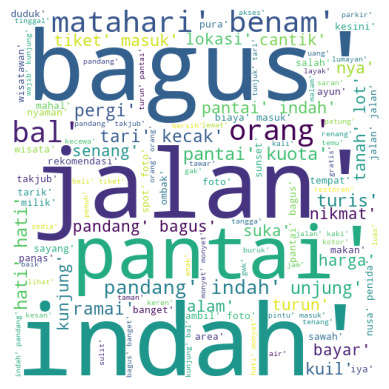

In [37]:
# Import library word cloud
from wordcloud import WordCloud

# Hasil stemming
stemm_list = data_gabungan['stemming'].tolist()
stemm_ls = []

# Menambahkan semua kata hasil stemming
for w in stemm_list:
  stemm_ls += w

wc=WordCloud(width=500,height=500,min_font_size=10,background_color='white')
# content
stemming=wc.generate(str(stemm_ls))
plt.axis('off') # Menghilangkan sumbu x dan y
plt.imshow(stemming)

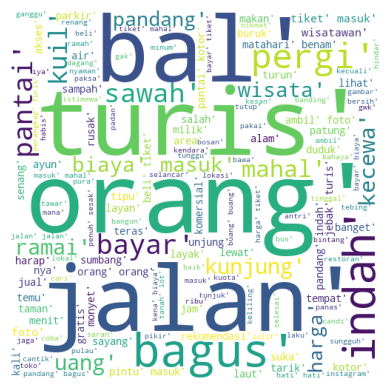

In [38]:
# Hasil stemming
stemm_list = data_gabungan[data_gabungan['Label'] == 'Negatif']['stemming'].tolist()
stemm_ls = []

# Menambahkan semua kata hasil stemming
for w in stemm_list:
    stemm_ls += w

# Membuat objek WordCloud
wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white')

# Membuat word cloud hanya untuk data yang memiliki label negatif
if stemm_ls:
    # content
    stemming = wc.generate(str(stemm_ls))

    # Menampilkan word cloud
    plt.imshow(stemming)
    plt.axis('off')
    plt.show()
else:
    print("Tidak ada data dengan label negatif.")

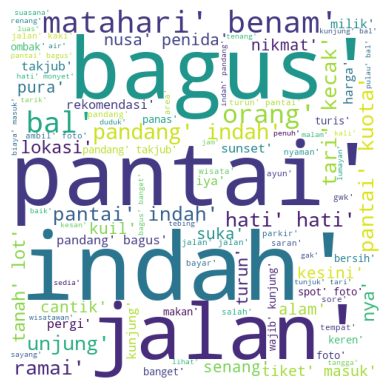

In [39]:
# Hasil stemming
stemm_list = data_gabungan[data_gabungan['Label'] == 'Positif']['stemming'].tolist()
stemm_ls = []
# Menambahkan semua kata hasil stemming ke stemm_ls
for w in stemm_list:
    stemm_ls += w

# Membuat objek WordCloud
wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white')

# Membuat word cloud hanya untuk data yang memiliki label negatif
if stemm_ls:
    # content
    stemming = wc.generate(str(stemm_ls))

    # Menampilkan word cloud
    plt.imshow(stemming)
    plt.axis('off')
    plt.show()
else:
    print("Tidak ada data dengan label neutral.")

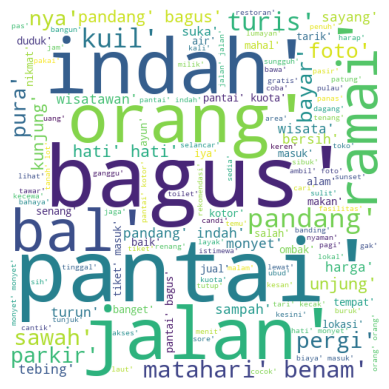

In [40]:
# Hasil stemming
stemm_list = data_gabungan[data_gabungan['Label'] == 'Netral']['stemming'].tolist()
stemm_ls = []
# Menambahkan semua kata hasil stemming ke stemm_ls
for w in stemm_list:
    stemm_ls += w

# Membuat objek WordCloud
wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white')

# Membuat word cloud hanya untuk data yang memiliki label negatif
if stemm_ls:
    # content
    stemming = wc.generate(str(stemm_ls))

    # Menampilkan word cloud
    plt.imshow(stemming)
    plt.axis('off')  # Menghilangkan sumbu x dan y
    plt.show()
else:
    print("Tidak ada data dengan label neutral.")

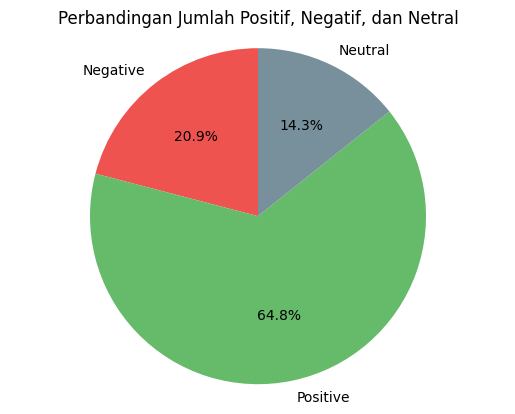

In [41]:
import matplotlib.pyplot as plt

negative_label = (data_gabungan[data_gabungan['Label'] == 'Negatif']['Label']).count()
positive_label = (data_gabungan[data_gabungan['Label'] == 'Positif']['Label']).count()
neutral_label = (data_gabungan[data_gabungan['Label'] == 'Netral']['Label']).count()

labels = ['Negative', 'Positive', 'Neutral']
values = [negative_label, positive_label, neutral_label]

colors = ['#ef5350', '#66bb6a', '#78909c']

plt.pie(values, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title("Perbandingan Jumlah Positif, Negatif, dan Netral")
plt.axis('equal')
plt.show()

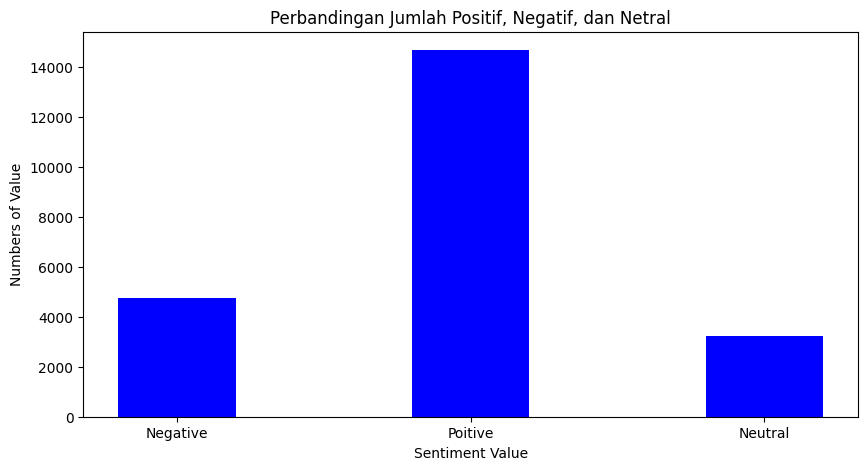

In [42]:
negative_label = (data_gabungan[data_gabungan['Label'] == 'Negatif']['Label']).count()
positive_label = (data_gabungan[data_gabungan['Label'] == 'Positif']['Label']).count()
neutral_label = (data_gabungan[data_gabungan['Label'] == 'Netral']['Label']).count()

label = ['Negative', 'Poitive', 'Neutral']
values = [negative_label, positive_label, neutral_label]

fig = plt.figure(figsize = (10, 5))

# membuat bar plot
plt.bar(label, values, color ='blue', width = 0.4)

plt.xlabel("Sentiment Value")
plt.ylabel("Numbers of Value")
plt.title("Perbandingan Jumlah Positif, Negatif, dan Netral")
plt.show()

In [45]:
# Menyimpan DataFrame ke dalam file CSV
nama_file_output = 'Hasil Pre-Processing DATA GABUNGAN.csv'  # Nama file CSV yang ingin Anda simpan
data_gabungan.to_csv(nama_file_output, index=False)

## PEMBAGIAN DATA TRAIN DAN YANG AKAN DI FORECASTING

In [46]:
data_gabungan_baru = pd.read_csv("Hasil Pre-Processing DATA GABUNGAN.csv")

In [47]:
data_gabungan_baru

Label                                            Comment  \
0      Positif  I love all beach at Nusa Penida\n\nSalah satu ...   
1      Positif  Tiket:\nHarga tiket masuk sebesar Rp. 35.000 m...   
2      Positif  (+) Terletak di wilayah timur Nusa Penida, Dia...   
3      Positif  Akses menuju pantai ini berliku-liku, penuh ta...   
4      Positif  Sampai sini pas diatas jam 12 Siang. Panas bgt...   
...        ...                                                ...   
23837  Positif  Tempat yang sangat bagus. Kuil yang menghadap ...   
23838  Positif  4.2\n(Pemandangan tebing dan matahari terbenam...   
23839  Positif  Dengan pemandangan laut yang menakjubkan dan t...   
23840  Positif  Kuil indah yang menghadap ke air. Monyet-monye...   
23841  Positif  Tempatnya sangat bagus. Ada monyet di kuil dan...   

                                                Cleaning  \
0      I love all beach at Nusa Penida\n\nSalah satu ...   
1      Tiket \nHarga tiket masuk sebesar Rp      menc...   
2      Terletak di wilayah timur Nusa Penida  Diamond...   
3      Akses menuju pantai ini berliku liku  penuh ta...   
4      Sampai sini pas diatas jam   Siang  Panas bgt ...   
...                                                  ...   
23837  Tempat yang sangat bagus  Kuil yang menghadap ...   
23838  \n Pemandangan tebing dan matahari terbenam ya...   
23839  Dengan pemandangan laut yang menakjubkan dan t...   
23840  Kuil indah yang menghadap ke air  Monyet monye...   
23841  Tempatnya sangat bagus  Ada monyet di kuil dan...   

                                              clearSpace  \
0      I love all beach at Nusa Penida  Salah satu ny...   
1      Tiket  Harga tiket masuk sebesar Rp      menca...   
2      Terletak di wilayah timur Nusa Penida  Diamond...   
3      Akses menuju pantai ini berliku liku  penuh ta...   
4      Sampai sini pas diatas jam   Siang  Panas bgt ...   
...                                                  ...   
23837  Tempat yang sangat bagus  Kuil yang menghadap ...   
23838    Pemandangan tebing dan matahari terbenam yan...   
23839  Dengan pemandangan laut yang menakjubkan dan t...   
23840  Kuil indah yang menghadap ke air  Monyet monye...   
23841  Tempatnya sangat bagus  Ada monyet di kuil dan...   

                                              hapusEmoji  \
0      I love all beach at Nusa Penida  Salah satu ny...   
1      Tiket  Harga tiket masuk sebesar Rp      menca...   
2      Terletak di wilayah timur Nusa Penida  Diamond...   
3      Akses menuju pantai ini berliku liku  penuh ta...   
4      Sampai sini pas diatas jam   Siang  Panas bgt ...   
...                                                  ...   
23837  Tempat yang sangat bagus  Kuil yang menghadap ...   
23838    Pemandangan tebing dan matahari terbenam yan...   
23839  Dengan pemandangan laut yang menakjubkan dan t...   
23840  Kuil indah yang menghadap ke air  Monyet monye...   
23841  Tempatnya sangat bagus  Ada monyet di kuil dan...   

                                              replaceTOM  \
0      I love all beach at Nusa Penida  Salah satu ny...   
1      Tiket  Harga tiket masuk sebesar Rp mencakup w...   
2      Terletak di wilayah timur Nusa Penida  Diamond...   
3      Akses menuju pantai ini berliku liku  penuh ta...   
4      Sampai sini pas diatas jam Siang  Panas bgt  t...   
...                                                  ...   
23837  Tempat yang sangat bagus  Kuil yang menghadap ...   
23838    Pemandangan tebing dan matahari terbenam yan...   
23839  Dengan pemandangan laut yang menakjubkan dan t...   
23840  Kuil indah yang menghadap ke air  Monyet monye...   
23841  Tempatnya sangat bagus  Ada monyet di kuil dan...   

                                             caseFolding  \
0      i love all beach at nusa penida  salah satu ny...   
1      tiket  harga tiket masuk sebesar rp mencakup w...   
2      terletak di wilayah timur nusa penida  diamond...   
3      akses menuju pantai ini berliku liku  penuh ta...

In [48]:
data_gabungan_baru.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23842 entries, 0 to 23841
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Label            23842 non-null  object
 1   Comment          23842 non-null  object
 2   Cleaning         23842 non-null  object
 3   clearSpace       23842 non-null  object
 4   hapusEmoji       23835 non-null  object
 5   replaceTOM       23835 non-null  object
 6   caseFolding      23835 non-null  object
 7   tokenizing       23842 non-null  object
 8   formalisasi      23842 non-null  object
 9   stopwordRemoval  23842 non-null  object
 10  stemming         23842 non-null  object
dtypes: object(11)
memory usage: 2.0+ MB


In [49]:
data_gabungan_baru = data_gabungan_baru[['Label', 'stemming']]

In [50]:
data_gabungan_baru.head()

Label                                           stemming
0  Positif  ['love', 'beach', 'nusa', 'penida', 'salah', '...
1  Positif  ['tiket', 'harga', 'tiket', 'masuk', 'rupiah',...
2  Positif  ['letak', 'wilayah', 'timur', 'nusa', 'penida'...
3  Positif  ['akses', 'pantai', 'liku', 'liku', 'penuh', '...
4  Positif  ['pas', 'atas', 'jam', 'siang', 'panas', 'bang...

In [51]:
# Membuat sampel 1000 data untuk setiap Label
data_positif = data_gabungan_baru[data_gabungan_baru['Label'] == 'Positif'].sample(n=1000, random_state=42)
data_negatif = data_gabungan_baru[data_gabungan_baru['Label'] == 'Negatif'].sample(n=1000, random_state=42)
data_netral = data_gabungan_baru[data_gabungan_baru['Label'] == 'Netral'].sample(n=1000, random_state=42)

# Menggabungkan semua sampel menjadi satu DataFrame
data_gabungan_baru_train = pd.concat([data_positif, data_negatif, data_netral])

# mengacak kembali seluruh DataFrame yang baru
data_gabungan_baru_train = data_gabungan_baru_train.sample(frac=1, random_state=42).reset_index(drop=True)

In [52]:
data_gabungan_baru_train

Label                                           stemming
0     Negatif  ['turis', 'jual', 'ngotot', 'pantai', 'penuh',...
1     Negatif  ['kecewa', 'serang', 'turis', 'wow', 'kuil', '...
2     Negatif  ['ombak', 'campur', 'sampah', 'ampun', 'manusi...
3     Positif                                          ['bagus']
4      Netral                                 ['malam', 'gelap']
...       ...                                                ...
2995  Negatif  ['objek', 'wisata', 'murni', 'banding', 'teras...
2996  Negatif                     ['turis', 'cantik', 'selamat']
2997  Negatif  ['indah', 'komersial', 'jalan', 'jalan', 'semp...
2998  Negatif  ['pantai', 'kotor', 'kunjung', 'umur', 'hidup'...
2999  Positif  ['saran', 'sewa', 'gaun', 'ambil', 'gambar', '...

[3000 rows x 2 columns]

In [53]:
# mengacak kembali seluruh DataFrame yang baru
data_gabungan_baru_train = data_gabungan_baru_train.sample(frac=1, random_state=42).reset_index(drop=True)

In [54]:
data_gabungan_baru_train

Label                                           stemming
0      Netral  ['pariwisata', 'sempurna', 'akses', 'normal', ...
1      Netral                                 ['bagus', 'harap']
2      Netral                        ['wajib', 'kunjung', 'bal']
3     Negatif  ['pergi', 'batu', 'biaya', 'masuk', 'bal', 'ua...
4     Positif  ['kali', 'kunjung', 'gwk', 'tempat', 'bersih',...
...       ...                                                ...
2995  Negatif  ['viewnya', 'mantap', 'crowded', 'spot', 'diko...
2996   Netral  ['kali', 'bal', 'pantai', 'sayang', 'moment', ...
2997  Negatif  ['unjung', 'pantai', 'kuota', 'tahun', 'sayang...
2998  Positif                                          ['bagus']
2999   Netral  ['kawasan', 'pinggir', 'tebing', 'langsung', '...

[3000 rows x 2 columns]

## READ DATASET HASIL PRE-PROCESSING

In [2]:
import pandas as pd

In [3]:
data_gabungan = pd.read_csv('Hasil Pre-Processing DATA GABUNGAN.csv')

In [4]:
data_gabungan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23842 entries, 0 to 23841
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Label            23842 non-null  object
 1   Comment          23842 non-null  object
 2   Cleaning         23842 non-null  object
 3   clearSpace       23842 non-null  object
 4   hapusEmoji       23835 non-null  object
 5   replaceTOM       23835 non-null  object
 6   caseFolding      23835 non-null  object
 7   tokenizing       23842 non-null  object
 8   formalisasi      23842 non-null  object
 9   stopwordRemoval  23842 non-null  object
 10  stemming         23842 non-null  object
dtypes: object(11)
memory usage: 2.0+ MB


In [6]:
data_gabungan = data_gabungan[['Label', 'stemming']]

## SPLIT DATASET

In [8]:
# Import library sklearn
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [26]:
data_gabungan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23842 entries, 0 to 23841
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Label     23842 non-null  object
 1   stemming  23842 non-null  object
dtypes: object(2)
memory usage: 372.7+ KB


In [28]:
# Mengganti nilai pada kolom 'label'
data_gabungan['Label'] = data_gabungan['Label'].replace({1: 'Positif', 0: 'Netral', -1: 'Negatif'})

In [29]:
# Mengecek jumlah setiap nilai unik dalam kolom 'label'
label_counts = data_gabungan['Label'].value_counts()

# Menampilkan hasil
print(label_counts)

Label
Positif    15688
Negatif     4881
Netral      3273
Name: count, dtype: int64


In [30]:
data_gabungan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23842 entries, 0 to 23841
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Label     23842 non-null  object
 1   stemming  23842 non-null  object
dtypes: object(2)
memory usage: 372.7+ KB


In [31]:
data_gabungan.head()

Label                                           stemming
0  Positif  ['love', 'beach', 'nusa', 'penida', 'salah', '...
1  Positif  ['tiket', 'harga', 'tiket', 'masuk', 'rupiah',...
2  Positif  ['letak', 'wilayah', 'timur', 'nusa', 'penida'...
3  Positif  ['akses', 'pantai', 'liku', 'liku', 'penuh', '...
4  Positif  ['pas', 'atas', 'jam', 'siang', 'panas', 'bang...

In [32]:
X = data_gabungan['stemming']
Y = data_gabungan['Label']

In [69]:
Y = Y.replace({'Positif', 'Netral', 'Negatif'})

x_train, x_test, y_train, y_test = model_selection.train_test_split(X, Y, test_size=0.2, random_state=64)

C:\Users\proda\AppData\Local\Temp\ipykernel_53320\3421373508.py:1: FutureWarning: Series.replace without 'value' and with non-dict-like 'to_replace' is deprecated and will raise in a future version. Explicitly specify the new values instead.
  Y = Y.replace({'Positif', 'Netral', 'Negatif'})


In [70]:
# Jumlah data total
jumlah_data_total = data_gabungan.shape[0]
print("Jumlah data total:", jumlah_data_total)

# Cetak jumlah data uji dan data latih
print("Jumlah Data Uji:", x_test.shape[0])
print("Jumlah Data Latih:", x_train.shape[0])

# Hitung jumlah data uji dengan sentimen positif dan negatif
pos = (y_test == 'Positif').sum()
net = (y_test == 'Netral').sum()
neg = (y_test == 'Negatif').sum()

# Hitung jumlah data latih dengan sentimen positif dan negatif
postrain = (y_train == 'Positif').sum()
nettrain = (y_train == 'Netral').sum()
negtrain = (y_train == 'Negatif').sum()

# Cetak jumlah data uji dan latih dengan sentimen positif dan negatif
print("Jumlah data uji dengan sentimen positif:", pos)
print("Jumlah data uji dengan sentimen netral:", net)
print("Jumlah data uji dengan sentimen negatif:", neg)
print("Jumlah data latih dengan sentimen positif:", postrain)
print("Jumlah data latih dengan sentimen netral:", nettrain)
print("Jumlah data latih dengan sentimen negatif:", negtrain)

Jumlah data total: 23842
Jumlah Data Uji: 4769
Jumlah Data Latih: 19073
Jumlah data uji dengan sentimen positif: 3114
Jumlah data uji dengan sentimen netral: 680
Jumlah data uji dengan sentimen negatif: 975
Jumlah data latih dengan sentimen positif: 12574
Jumlah data latih dengan sentimen netral: 2593
Jumlah data latih dengan sentimen negatif: 3906


## TF-IDF

In [58]:
!pip install scikit-learn

   ---------------------------------------- 11.0/11.0 MB 4.4 MB/s eta 0:00:00
   ---------------------------------------- 15.6/15.6 MB 4.8 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4


  You can safely remove it manually.
  You can safely remove it manually.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
streamlit 1.32.2 requires packaging<24,>=16.8, but you have packaging 24.0 which is incompatible.


In [71]:
# Memilih data testing
nnn = x_test[20:21]
print(nnn)

# Memproses text mentah dalam bentuk token
def dummy_fun(doc):
    return doc

# mengonversi kumpulan dokumen teks menjadi representasi vektor dengan metode (TF-IDF)
vectorizer = TfidfVectorizer(analyzer='word',
    tokenizer=dummy_fun,
    preprocessor=dummy_fun,
    token_pattern=None)

#  Mengubah teks dalam data latih menjadi representasi vektor TF-IDF
x_train = vectorizer.fit_transform(x_train)
# Mengubah teks dalam data uji menjadi representasi vektor TF-IDF
x_test = vectorizer.transform(x_test)
# Membuat objek LabelEncoder untuk mengkodekan label kategori menjadi bilangan bulat
Encoder = LabelEncoder()
# Mengkodekan label kategori pada data latih menjadi bilangan bulat
y_train = Encoder.fit_transform(y_train)
# Mengkodekan label kategori pada data uji menjadi bilangan bulat
y_test = Encoder.fit_transform(y_test)

# Mencetak representasi vektor TF-IDF dari sampel yang telah dipilih dari data uji (nnn)
print(vectorizer.transform(nnn))

2992    ['restoran', 'milik', 'pandang', 'indah', 'pat...
Name: stemming, dtype: object
  (0, 0)	0.319746498702246
  (0, 1)	0.632272807635585
  (0, 2)	0.3197633364814311
  (0, 3)	0.020825326099942098
  (0, 4)	0.020825326099942098
  (0, 5)	0.36630548668777196
  (0, 6)	0.02718429666596291
  (0, 8)	0.09249449191302786
  (0, 9)	0.05218362266331486
  (0, 11)	0.1295561279113617
  (0, 12)	0.08730866263696821
  (0, 13)	0.1666804699070003
  (0, 15)	0.026159407797064285
  (0, 16)	0.05704896068982348
  (0, 17)	0.0568660608026673
  (0, 18)	0.3012573802743503
  (0, 19)	0.06438002720655678
  (0, 20)	0.19294863898636935
  (0, 22)	0.07900516307519002
  (0, 23)	0.09860430368721214
  (0, 24)	0.12483513915689214
  (0, 25)	0.14881502865983504
  (0, 27)	0.04302438519907194
  (0, 29)	0.04052401563860495


# MODEL NAIVE BAYES

In [6]:
import pandas as pd

In [7]:
data_gabunganv2 = pd.read_csv('Hasil Pre-Processing DATA GABUNGAN.csv')

In [8]:
data_gabunganv2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23842 entries, 0 to 23841
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Label            23842 non-null  object
 1   Comment          23842 non-null  object
 2   Cleaning         23842 non-null  object
 3   clearSpace       23842 non-null  object
 4   hapusEmoji       23835 non-null  object
 5   replaceTOM       23835 non-null  object
 6   caseFolding      23835 non-null  object
 7   tokenizing       23842 non-null  object
 8   formalisasi      23842 non-null  object
 9   stopwordRemoval  23842 non-null  object
 10  stemming         23842 non-null  object
dtypes: object(11)
memory usage: 2.0+ MB


In [4]:
import string
from sklearn.feature_extraction.text import CountVectorizer

def preprocess_text(text):
    # Mengubah teks menjadi huruf kecil
    text = text.lower()
    # Menghapus tanda baca
    text = text.translate(str.maketrans('', '', string.punctuation))
    return text

data_gabunganv2['stemming'] = data_gabunganv2['stemming'].apply(preprocess_text)

In [9]:
data_gabunganv2.head()

Label                                            Comment  \
0  Positif  I love all beach at Nusa Penida\n\nSalah satu ...   
1  Positif  Tiket:\nHarga tiket masuk sebesar Rp. 35.000 m...   
2  Positif  (+) Terletak di wilayah timur Nusa Penida, Dia...   
3  Positif  Akses menuju pantai ini berliku-liku, penuh ta...   
4  Positif  Sampai sini pas diatas jam 12 Siang. Panas bgt...   

                                            Cleaning  \
0  I love all beach at Nusa Penida\n\nSalah satu ...   
1  Tiket \nHarga tiket masuk sebesar Rp      menc...   
2  Terletak di wilayah timur Nusa Penida  Diamond...   
3  Akses menuju pantai ini berliku liku  penuh ta...   
4  Sampai sini pas diatas jam   Siang  Panas bgt ...   

                                          clearSpace  \
0  I love all beach at Nusa Penida  Salah satu ny...   
1  Tiket  Harga tiket masuk sebesar Rp      menca...   
2  Terletak di wilayah timur Nusa Penida  Diamond...   
3  Akses menuju pantai ini berliku liku  penuh ta...   
4  Sampai sini pas diatas jam   Siang  Panas bgt ...   

                                          hapusEmoji  \
0  I love all beach at Nusa Penida  Salah satu ny...   
1  Tiket  Harga tiket masuk sebesar Rp      menca...   
2  Terletak di wilayah timur Nusa Penida  Diamond...   
3  Akses menuju pantai ini berliku liku  penuh ta...   
4  Sampai sini pas diatas jam   Siang  Panas bgt ...   

                                          replaceTOM  \
0  I love all beach at Nusa Penida  Salah satu ny...   
1  Tiket  Harga tiket masuk sebesar Rp mencakup w...   
2  Terletak di wilayah timur Nusa Penida  Diamond...   
3  Akses menuju pantai ini berliku liku  penuh ta...   
4  Sampai sini pas diatas jam Siang  Panas bgt  t...   

                                         caseFolding  \
0  i love all beach at nusa penida  salah satu ny...   
1  tiket  harga tiket masuk sebesar rp mencakup w...   
2  terletak di wilayah timur nusa penida  diamond...   
3  akses menuju pantai ini berliku liku  penuh ta...   
4  sampai sini pas diatas jam siang  panas bgt  t...   

                                          tokenizing  \
0  ['i', 'love', 'all', 'beach', 'at', 'nusa', 'p...   
1  ['tiket', 'harga', 'tiket', 'masuk', 'sebesar'...   
2  ['terletak', 'di', 'wilayah', 'timur', 'nusa',...   
3  ['akses', 'menuju', 'pantai', 'ini', 'berliku'...   
4  ['sampai', 'sini', 'pas', 'diatas', 'jam', 'si...   

                                         formalisasi  \
0  ['i', 'love', 'all', 'beach', 'at', 'nusa', 'p...   
1  ['tiket', 'harga', 'tiket', 'masuk', 'sebesar'...   
2  ['terletak', 'di', 'wilayah', 'timur', 'nusa',...   
3  ['akses', 'menuju', 'pantai', 'ini', 'berliku'...   
4  ['sampai', 'sini', 'pas', 'diatas', 'jam', 'si...   

                                     stopwordRemoval  \
0  ['love', 'beach', 'nusa', 'penida', 'salah', '...   
1  ['tiket', 'harga', 'tiket', 'masuk', 'rupiah',...   
2  ['terletak', 'wilayah', 'timur', 'nusa', 'peni...   
3  ['akses', 'pantai', 'berliku', 'liku', 'penuh'...   
4  ['pas', 'diatas', 'jam', 'siang', 'panas', 'ba...   

                                            stemming  
0  ['love', 'beach', 'nusa', 'penida', 'salah', '...  
1  ['tiket', 'harga', 'tiket', 'masuk', 'rupiah',...  
2  ['letak', 'wilayah', 'timur', 'nusa', 'penida'...  
3  ['akses', 'pantai', 'liku', 'liku', 'penuh', '...  
4  ['pas', 'atas', 'jam', 'siang', 'panas', 'bang...

In [10]:
from sklearn.model_selection import train_test_split

X = data_gabunganv2['stemming']
y = data_gabunganv2['Label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

In [12]:
# Membuat objek TfidfVectorizer
nb_tfidf_vectorizer = TfidfVectorizer()

# Mengonversi teks menjadi fitur TF-IDF
X_train_tfidf = nb_tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = nb_tfidf_vectorizer.transform(X_test)

In [13]:
    # Menentukan parameter grid
    nb_param_grid = {
        'alpha': [0.01, 0.1, 0.5, 1.0, 1.5, 2.0],  # Parameter alpha untuk MultinomialNB
    }

In [14]:
# Membuat objek model Naive Bayes
naive_bayes_model = MultinomialNB()

# Membuat objek GridSearchCV
nb_grid_search = GridSearchCV(estimator=naive_bayes_model, param_grid=nb_param_grid, cv=5, scoring='accuracy')

# Melatih model menggunakan Grid Search dengan data pelatihan
nb_grid_search.fit(X_train_tfidf, y_train)

# Mendapatkan model terbaik dari hasil Grid Search
nb_best_model = nb_grid_search.best_estimator_

nb_best_model

MultinomialNB(alpha=0.1)

In [15]:
# Memprediksi label untuk data pengujian
y_pred = nb_best_model.predict(X_test_tfidf)

# Menghitung akurasi model
accuracy = accuracy_score(y_test, y_pred)
print("Akurasi model terbaik: {:.2f}%".format(accuracy * 100))
print("Parameter terbaik: ", nb_grid_search.best_params_)

Akurasi model terbaik: 74.86%
Parameter terbaik:  {'alpha': 0.1}


In [16]:
from sklearn.metrics import classification_report

# Membuat classification report
report = classification_report(y_test, y_pred)

# Menampilkan classification report
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

     Negatif       0.72      0.53      0.61      1030
      Netral       0.41      0.05      0.09       623
     Positif       0.76      0.96      0.85      3116

    accuracy                           0.75      4769
   macro avg       0.63      0.51      0.52      4769
weighted avg       0.71      0.75      0.70      4769



In [18]:
import pickle

In [19]:
# Simpan TF-IDF vectorizer ke file
with open('MODEL/nb_tfidf_vectorizer.pkl', 'wb') as file:
    pickle.dump(nb_tfidf_vectorizer, file)

# Simpan model ke file
with open('MODEL/nb_trained_model.pkl', 'wb') as file:
    pickle.dump(nb_best_model, file)

## IMPORT MODEL NB BEFORE PREDICT

In [21]:
# Muat TF-IDF vectorizer dari file
with open('MODEL/nb_tfidf_vectorizer.pkl', 'rb') as file:
    nb_tfidf_vectorizer = pickle.load(file)

# Muat model dari file
with open('MODEL/nb_trained_model.pkl', 'rb') as file:
    nb_model = pickle.load(file)

In [22]:
# Definisi fungsi preprocessing
def preprocess_text(text):
    text = text.lower()  # Mengubah teks menjadi huruf kecil
    # Tambahkan preprocessing lain sesuai kebutuhan
    return text

## GWK

### SAVE PREDIKSI LABEL GWK NAIVE BAYES

In [25]:
# Memuat file CSV baru untuk prediksi
data_baru = pd.read_csv('DATASET_TripAdvisor/gwk.csv')

In [29]:
# Melakukan preprocessing jika diperlukan
data_baru['comment'] = data_baru['comment'].apply(preprocess_text)

# Mengubah data ulasan menjadi vektor TF-IDF
tfidf_matrix = nb_tfidf_vectorizer.transform(data_baru['comment'])

# Melakukan prediksi
prediksi = nb_model.predict(tfidf_matrix)

# Menambahkan kolom prediksi ke DataFrame
data_baru['label_prediksi'] = prediksi

# Jika Anda ingin mengonversi kolom prediksi menjadi float
data_baru['label_prediksi'] = data_baru['label_prediksi']

# Menyimpan hasil prediksi ke variabel baru
data_ulasan_predictlabel = data_baru.copy()

# Menampilkan hasil
print(data_ulasan_predictlabel)

# Menyimpan hasil ke file CSV baru
data_baru.to_csv('Hasil-Prediksi/NAIVE BAYES/Prediksi_GWK_Naive Bayes.csv', index=False)

                                               comment label_prediksi
0    patung terbesar di bali, areanya luas sekali s...        Positif
1    gwk merupakan tempat wisata yang banyak di min...        Positif
2    pemandangan yang cukup menarik, patung yang be...        Positif
3    sangat luar biasa bisa berkunjung kesini. patu...        Positif
4    gwk, sangat menakjubkan, selain indah jg memil...        Positif
..                                                 ...            ...
748  gwk terletak di ungasan, sekitar 10 menit dari...        Positif
749  dua patung-patung besar sangat mengesankan tap...         Netral
750  tempat ini "dibangun", ada tidak ada banyak un...         Netral
751  hal ini jelas bahwa atraksi budaya ini belum s...         Netral
752  sebuah atraksi yang bagus di bali, yang terlet...        Positif

[753 rows x 2 columns]


### CEK PREDIKSI LABEL GWK

In [30]:
data_prediksi_gwk_NB = pd.read_csv('Hasil-Prediksi/NAIVE BAYES/Prediksi_GWK_Naive Bayes.csv')

In [31]:
data_prediksi_gwk_NB.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 753 entries, 0 to 752
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   comment         753 non-null    object
 1   label_prediksi  753 non-null    object
dtypes: object(2)
memory usage: 11.9+ KB


In [32]:
value_GWK_NB = data_prediksi_gwk_NB['label_prediksi'].value_counts()

print(value_GWK_NB)

label_prediksi
Positif    520
Netral     189
Negatif     44
Name: count, dtype: int64


## SANUR BEACH

In [33]:
# Memuat file CSV baru untuk prediksi
data_baru = pd.read_csv('DATASET_TripAdvisor/pantai_sanur.csv')

In [34]:
# Melakukan preprocessing jika diperlukan
data_baru['comment'] = data_baru['comment'].apply(preprocess_text)

# Mengubah data ulasan menjadi vektor TF-IDF
tfidf_matrix = nb_tfidf_vectorizer.transform(data_baru['comment'])

# Melakukan prediksi
prediksi = nb_model.predict(tfidf_matrix)

# Menambahkan kolom prediksi ke DataFrame
data_baru['label_prediksi'] = prediksi

# Jika Anda ingin mengonversi kolom prediksi menjadi float
data_baru['label_prediksi'] = data_baru['label_prediksi']

# Menyimpan hasil prediksi ke variabel baru
data_ulasan_predictlabel = data_baru.copy()

# Menampilkan hasil
print(data_ulasan_predictlabel)

# Menyimpan hasil ke file CSV baru
data_baru.to_csv('Hasil-Prediksi/NAIVE BAYES/Prediksi_Pantai Sanur_Naive Bayes.csv', index=False)

                                                comment label_prediksi
0     pantai sanur...pantai sunrise di bali. sangat ...        Positif
1     tempat yang indah untuk jalan pagi. dari renon...         Netral
2     tidak pernah terbayangkan , setelah dapat julu...        Positif
3     salah satu pantai yang menarik,sangat cocok me...        Positif
4     buat yang mw berlibur bersama keluarga sangt c...        Positif
...                                                 ...            ...
2837  pantai sanur adalah panjang pasir dengan board...         Netral
2838  jalan pantai membentang dari ujung sanur ke ya...        Positif
2839  tinggal di hyatt (sendiri mengerikan), memilik...         Netral
2840  ini adalah mimpi saya beach! aku tidak suka te...        Positif
2841  pantai sanur beberapa kilometer panjang dan me...         Netral

[2842 rows x 2 columns]


### CEK PREDIKSI LABEL SANUR BEACH

In [35]:
data_prediksi_pantaisanur_NB = pd.read_csv('Hasil-Prediksi/NAIVE BAYES/Prediksi_Pantai Sanur_Naive Bayes.csv')
data_prediksi_pantaisanur_NB.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2842 entries, 0 to 2841
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   comment         2842 non-null   object
 1   label_prediksi  2842 non-null   object
dtypes: object(2)
memory usage: 44.5+ KB


In [36]:
value_pantaisanur_NB = data_prediksi_pantaisanur_NB['label_prediksi'].value_counts()

print(value_pantaisanur_NB)

label_prediksi
Positif    1658
Netral     1114
Negatif      70
Name: count, dtype: int64


## KELINGKING BEACH

In [37]:
# Memuat file CSV baru untuk prediksi
data_baru = pd.read_csv('DATASET_TripAdvisor/pantai_kelingking.csv')

In [38]:
# Melakukan preprocessing jika diperlukan
data_baru['comment'] = data_baru['comment'].apply(preprocess_text)

# Mengubah data ulasan menjadi vektor TF-IDF
tfidf_matrix = nb_tfidf_vectorizer.transform(data_baru['comment'])

# Melakukan prediksi
prediksi = nb_model.predict(tfidf_matrix)

# Menambahkan kolom prediksi ke DataFrame
data_baru['label_prediksi'] = prediksi

# Jika Anda ingin mengonversi kolom prediksi menjadi float
data_baru['label_prediksi'] = data_baru['label_prediksi']

# Menyimpan hasil prediksi ke variabel baru
data_ulasan_predictlabel = data_baru.copy()

# Menampilkan hasil
print(data_ulasan_predictlabel)

# Menyimpan hasil ke file CSV baru
data_baru.to_csv('Hasil-Prediksi/NAIVE BAYES/Prediksi_Pantai Kelingking_Naive Bayes.csv', index=False)

                                                comment label_prediksi
0     disini kita bisa menikmati pemandangan persawa...         Netral
1     wow amazing,  sangat indah pemandangan salahny...        Positif
2     🔆 salah satu tempat yang patut dikunjungi keti...         Netral
3     tempat yg lumayan bagus untuk jalan jalan seke...         Netral
4     sebenarnya biasa aja, hanya ada sawah dengan b...         Netral
...                                                 ...            ...
3905  pemandangan yang bagus di mana kami tidak mend...         Netral
3906  saya merasa seperti berjalan di sebuah adegan ...         Netral
3907  sawah hanya bahwa: berserambi area kecil dari ...         Netral
3908  hampir tidak menjangkau situs ini adalah mungk...        Positif
3909  tempat ini tidak yang sangat besar, skala land...         Netral

[3910 rows x 2 columns]


### CEK PREDIKSI LABEL KELINGKING BEACH

In [40]:
data_prediksi_kelingkingbeach_NB = pd.read_csv('Hasil-Prediksi/NAIVE BAYES/Prediksi_Pantai Kelingking_Naive Bayes.csv')
data_prediksi_kelingkingbeach_NB.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3910 entries, 0 to 3909
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   comment         3910 non-null   object
 1   label_prediksi  3910 non-null   object
dtypes: object(2)
memory usage: 61.2+ KB


In [41]:
value_kelingkingbeach_NB = data_prediksi_kelingkingbeach_NB['label_prediksi'].value_counts()

print(value_kelingkingbeach_NB)

label_prediksi
Netral     2130
Positif    1551
Negatif     229
Name: count, dtype: int64


## KUTA BEACH

In [42]:
# Memuat file CSV baru untuk prediksi
data_baru = pd.read_csv('DATASET_TripAdvisor/pantai_kuta.csv')

In [43]:
# Melakukan preprocessing jika diperlukan
data_baru['comment'] = data_baru['comment'].apply(preprocess_text)

# Mengubah data ulasan menjadi vektor TF-IDF
tfidf_matrix = nb_tfidf_vectorizer.transform(data_baru['comment'])

# Melakukan prediksi
prediksi = nb_model.predict(tfidf_matrix)

# Menambahkan kolom prediksi ke DataFrame
data_baru['label_prediksi'] = prediksi

# Jika Anda ingin mengonversi kolom prediksi menjadi float
data_baru['label_prediksi'] = data_baru['label_prediksi']

# Menyimpan hasil prediksi ke variabel baru
data_ulasan_predictlabel = data_baru.copy()

# Menampilkan hasil
print(data_ulasan_predictlabel)

# Menyimpan hasil ke file CSV baru
data_baru.to_csv('Hasil-Prediksi/NAIVE BAYES/Prediksi_Pantai Kuta_Naive Bayes.csv', index=False)

                                                comment label_prediksi
0     pantai yang sangat terkenal di bali, biasanya ...         Netral
1     selalu jatuh cinta dengan pantai kuta dan seki...        Positif
2     i think it is the beautiful bepantai kuta bali...        Positif
3     pantai kuta di 2024 ini sudah jauh berbeda den...         Netral
4     tempat yang bagus untuk bersantai , banyak war...        Positif
...                                                 ...            ...
4263  tidak pantai terbaik di daerah, tetapi bersiap...         Netral
4264  saya tidak pernah melihat pantai karena kotor ...         Netral
4265  ada kota dan pantai di seluruh bali,seminyak, ...         Netral
4266  setelah 13 tahun absen, aku kecewa amat dengan...         Netral
4267  pantai ini sebenarnya cukup bagus, panjang dan...         Netral

[4268 rows x 2 columns]


### CEK PREDIKSI LABEL KUTA BEACH

In [44]:
data_prediksi_kutabeach_NB = pd.read_csv('Hasil-Prediksi/NAIVE BAYES/Prediksi_Pantai Kuta_Naive Bayes.csv')
data_prediksi_kutabeach_NB.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4268 entries, 0 to 4267
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   comment         4268 non-null   object
 1   label_prediksi  4268 non-null   object
dtypes: object(2)
memory usage: 66.8+ KB


In [45]:
value_kutabeach_NB = data_prediksi_kutabeach_NB['label_prediksi'].value_counts()

print(value_kutabeach_NB)

label_prediksi
Netral     2177
Positif    2001
Negatif      90
Name: count, dtype: int64


## TANAH LOT

In [46]:
# Memuat file CSV baru untuk prediksi
data_baru = pd.read_csv('DATASET_TripAdvisor/tanah_lot.csv')

In [47]:
# Melakukan preprocessing jika diperlukan
data_baru['comment'] = data_baru['comment'].apply(preprocess_text)

# Mengubah data ulasan menjadi vektor TF-IDF
tfidf_matrix = nb_tfidf_vectorizer.transform(data_baru['comment'])

# Melakukan prediksi
prediksi = nb_model.predict(tfidf_matrix)

# Menambahkan kolom prediksi ke DataFrame
data_baru['label_prediksi'] = prediksi

# Jika Anda ingin mengonversi kolom prediksi menjadi float
data_baru['label_prediksi'] = data_baru['label_prediksi']

# Menyimpan hasil prediksi ke variabel baru
data_ulasan_predictlabel = data_baru.copy()

# Menampilkan hasil
print(data_ulasan_predictlabel)

# Menyimpan hasil ke file CSV baru
data_baru.to_csv('Hasil-Prediksi/NAIVE BAYES/Prediksi_Tanah Lot_Naive Bayes.csv', index=False)

                                                comment label_prediksi
0     saya berkunjung dengan membawa wisatawan pada ...        Positif
1     pengalaman yang cukup berkesan bisa berkunjung...        Positif
2     sangat indah dan menjadi daya tarik wisata yan...        Positif
3     satu tempat terbaik lagi utk nonton sunset kal...        Positif
4     untuk tukang foto keliling di area pura tanah ...        Positif
...                                                 ...            ...
2895  ini adalah perjalanan kedua saya ke tanah lot ...         Netral
2896  itu adalah kunjungan pertama kami hari itu - k...         Netral
2897  ini adalah kunjungan kedua saya ke kuil tanah ...         Netral
2898  di awal juni 2015, saya dan keluarga mengunjun...        Positif
2899  benar-benar ingin memukul tempat ini kita wakt...         Netral

[2900 rows x 2 columns]


### CEK PREDIKSI LABEL TANAH LOT

In [48]:
data_prediksi_tanahlot_NB = pd.read_csv('Hasil-Prediksi/NAIVE BAYES/Prediksi_Tanah Lot_Naive Bayes.csv')
data_prediksi_tanahlot_NB.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2900 entries, 0 to 2899
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   comment         2900 non-null   object
 1   label_prediksi  2900 non-null   object
dtypes: object(2)
memory usage: 45.4+ KB


In [49]:
value_tanahlot_NB = data_prediksi_tanahlot_NB['label_prediksi'].value_counts()

print(value_tanahlot_NB)

label_prediksi
Netral     1471
Positif    1351
Negatif      78
Name: count, dtype: int64


## TEGALALANG

In [50]:
# Memuat file CSV baru untuk prediksi
data_baru = pd.read_csv('DATASET_TripAdvisor/tegalalang_terrace.csv')

In [51]:
# Melakukan preprocessing jika diperlukan
data_baru['comment'] = data_baru['comment'].apply(preprocess_text)

# Mengubah data ulasan menjadi vektor TF-IDF
tfidf_matrix = nb_tfidf_vectorizer.transform(data_baru['comment'])

# Melakukan prediksi
prediksi = nb_model.predict(tfidf_matrix)

# Menambahkan kolom prediksi ke DataFrame
data_baru['label_prediksi'] = prediksi

# Jika Anda ingin mengonversi kolom prediksi menjadi float
data_baru['label_prediksi'] = data_baru['label_prediksi']

# Menyimpan hasil prediksi ke variabel baru
data_ulasan_predictlabel = data_baru.copy()

# Menampilkan hasil
print(data_ulasan_predictlabel)

# Menyimpan hasil ke file CSV baru
data_baru.to_csv('Hasil-Prediksi/NAIVE BAYES/Prediksi_Tegalalang_Naive Bayes.csv', index=False)

                                                comment label_prediksi
0     disini kita bisa menikmati pemandangan persawa...         Netral
1     wow amazing,  sangat indah pemandangan salahny...        Positif
2     🔆 salah satu tempat yang patut dikunjungi keti...         Netral
3     tempat yg lumayan bagus untuk jalan jalan seke...         Netral
4     sebenarnya biasa aja, hanya ada sawah dengan b...         Netral
...                                                 ...            ...
4262  beras lapangan pemandangan itu indah pics. ada...         Netral
4263  aku heran ini sedang bernada sebagai daya tari...         Netral
4264  berikut adalah sawah pada gambar halaman bali ...         Netral
4265  ketika saya melihat pada kartu pos tentang bal...        Positif
4266  rasanya hanya baik distrik pedesaan jepang tua...        Negatif

[4267 rows x 2 columns]


### CEK PREDIKSI LABEL TEGALALANG

In [52]:
data_prediksi_tegalalang_NB = pd.read_csv('Hasil-Prediksi/NAIVE BAYES/Prediksi_Tegalalang_Naive Bayes.csv')
data_prediksi_tegalalang_NB.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4267 entries, 0 to 4266
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   comment         4267 non-null   object
 1   label_prediksi  4267 non-null   object
dtypes: object(2)
memory usage: 66.8+ KB


In [53]:
value_tegalalang_NB = data_prediksi_tegalalang_NB['label_prediksi'].value_counts()

print(value_tegalalang_NB)

label_prediksi
Netral     2312
Positif    1698
Negatif     257
Name: count, dtype: int64


## ULUWATU

In [54]:
# Memuat file CSV baru untuk prediksi
data_baru = pd.read_csv('DATASET_TripAdvisor/uluwatu.csv')

In [55]:
# Melakukan preprocessing jika diperlukan
data_baru['comment'] = data_baru['comment'].apply(preprocess_text)

# Mengubah data ulasan menjadi vektor TF-IDF
tfidf_matrix = nb_tfidf_vectorizer.transform(data_baru['comment'])

# Melakukan prediksi
prediksi = nb_model.predict(tfidf_matrix)

# Menambahkan kolom prediksi ke DataFrame
data_baru['label_prediksi'] = prediksi

# Jika Anda ingin mengonversi kolom prediksi menjadi float
data_baru['label_prediksi'] = data_baru['label_prediksi']

# Menyimpan hasil prediksi ke variabel baru
data_ulasan_predictlabel = data_baru.copy()

# Menampilkan hasil
print(data_ulasan_predictlabel)

# Menyimpan hasil ke file CSV baru
data_baru.to_csv('Hasil-Prediksi/NAIVE BAYES/Prediksi_Uluwatu_Naive Bayes.csv', index=False)

                                                comment label_prediksi
0     tempat suci agama hindu bali (pura)terletak di...        Positif
1     uluwatu merupakan tempat ibadah orang bali yan...        Positif
2     pemandangan yg bagus dari tebing melihat luasn...         Netral
3     sangat bagus dan cocok untuk liburan berdama k...        Positif
4     salah satu daya tarik wisata yang sudah melege...        Positif
...                                                 ...            ...
3274  kami mengunjungi tempat ini di pagi hari karen...         Netral
3275  kami diatur untuk driver untuk membawa kita di...         Netral
3276  benar-benar pemandangan yang menakjubkan, teta...         Netral
3277  kami pergi ke uluwatu dengan mobil dengan sopi...         Netral
3278  aku harus memilih 1 dari banyak kuil di bali d...         Netral

[3279 rows x 2 columns]


### CEK PREDIKSI LABEL ULUWATU

In [56]:
data_prediksi_uluwatu_NB = pd.read_csv('Hasil-Prediksi/NAIVE BAYES/Prediksi_Uluwatu_Naive Bayes.csv')
data_prediksi_uluwatu_NB.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3279 entries, 0 to 3278
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   comment         3279 non-null   object
 1   label_prediksi  3279 non-null   object
dtypes: object(2)
memory usage: 51.4+ KB


In [57]:
value_uluwatu_NB = data_prediksi_uluwatu_NB['label_prediksi'].value_counts()

print(value_uluwatu_NB)

label_prediksi
Netral     1947
Positif    1246
Negatif      86
Name: count, dtype: int64


# MODEL DECISION TREE

In [50]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
import pickle

In [40]:
# Langkah 1: Persiapan Data
data_gabungan_dt = pd.read_csv("Hasil Pre-Processing DATA GABUNGAN.csv")

In [41]:
data_gabungan_dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23842 entries, 0 to 23841
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Label            23842 non-null  object
 1   Comment          23842 non-null  object
 2   Cleaning         23842 non-null  object
 3   clearSpace       23842 non-null  object
 4   hapusEmoji       23835 non-null  object
 5   replaceTOM       23835 non-null  object
 6   caseFolding      23835 non-null  object
 7   tokenizing       23842 non-null  object
 8   formalisasi      23842 non-null  object
 9   stopwordRemoval  23842 non-null  object
 10  stemming         23842 non-null  object
dtypes: object(11)
memory usage: 2.0+ MB


In [42]:
from sklearn.model_selection import train_test_split

X = data_gabungan_dt['stemming']
y = data_gabungan_dt['Label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [43]:
# Membuat objek TfidfVectorizer
dt_tfidf_vectorizer = TfidfVectorizer()

# Mengonversi teks menjadi fitur TF-IDF
X_train_tfidf = dt_tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = dt_tfidf_vectorizer.transform(X_test)

In [53]:
# Menentukan parameter grid untuk GridSearchCV
dt_param_grid = {
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [54]:
# Membuat objek model Naive Bayes
decision_tree_model = DecisionTreeClassifier()

# Membuat objek GridSearchCV
dt_grid_search = GridSearchCV(estimator=decision_tree_model, param_grid=dt_param_grid, cv=5, scoring='accuracy')

# Melatih model menggunakan Grid Search dengan data pelatihan
dt_grid_search.fit(X_train_tfidf, y_train)

# Mendapatkan model terbaik dari hasil Grid Search
dt_best_model = dt_grid_search.best_estimator_

dt_best_model

DecisionTreeClassifier(max_depth=10, min_samples_leaf=2, min_samples_split=5)

In [56]:
# Memprediksi label untuk data pengujian
y_pred = dt_best_model.predict(X_test_tfidf)

# Menghitung akurasi model
accuracy = accuracy_score(y_test, y_pred)
print("Akurasi model terbaik: {:.2f}%".format(accuracy * 100))
print("Parameter terbaik: ", dt_grid_search.best_params_)

Akurasi model terbaik: 70.87%
Parameter terbaik:  {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5}


In [57]:
from sklearn.metrics import classification_report

# Membuat classification report
report = classification_report(y_test, y_pred)

# Menampilkan classification report
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

     Negatif       0.64      0.37      0.47      1030
      Netral       0.21      0.02      0.03       623
     Positif       0.72      0.96      0.83      3116

    accuracy                           0.71      4769
   macro avg       0.53      0.45      0.44      4769
weighted avg       0.64      0.71      0.64      4769



In [58]:
# Simpan TF-IDF vectorizer ke file
with open('MODEL/dt_tfidf_vectorizer.pkl', 'wb') as file:
    pickle.dump(dt_tfidf_vectorizer, file)

# Simpan model ke file
with open('MODEL/dt_trained_model.pkl', 'wb') as file:
    pickle.dump(dt_best_model, file)

## IMPORT MODEL NB BEFORE PREDICT

In [59]:
# MODEL NAIVE BAYES
# Muat TF-IDF vectorizer dari file
with open('MODEL/dt_tfidf_vectorizer.pkl', 'rb') as file:
    dt_tfidf_vectorizer = pickle.load(file)

# Muat model dari file
with open('MODEL/dt_trained_model.pkl', 'rb') as file:
    dt_model = pickle.load(file)

In [60]:
# Definisi fungsi preprocessing
def preprocess_text(text):
    text = text.lower()  # Mengubah teks menjadi huruf kecil
    # Tambahkan preprocessing lain sesuai kebutuhan
    return text

## GWK

In [61]:
# Membaca data baru dari file CSV
data_baru = pd.read_csv("DATASET_TripAdvisor/gwk.csv")

In [62]:
# Melakukan preprocessing jika diperlukan
data_baru['comment'] = data_baru['comment'].apply(preprocess_text)

# Mengubah data ulasan menjadi vektor TF-IDF
tfidf_matrix = dt_tfidf_vectorizer.transform(data_baru['comment'])

# Melakukan prediksi
prediksi = dt_model.predict(tfidf_matrix)

# Menambahkan kolom prediksi ke DataFrame
data_baru['label_prediksi'] = prediksi

# Jika Anda ingin mengonversi kolom prediksi menjadi float
data_baru['label_prediksi'] = data_baru['label_prediksi']

# Menyimpan hasil prediksi ke variabel baru
data_ulasan_predictlabel = data_baru.copy()

# Menampilkan hasil
print(data_ulasan_predictlabel)

# Menyimpan hasil ke file CSV baru
data_baru.to_csv('Hasil-Prediksi/DECISION TREE/Prediksi_GWK_Decision Tree.csv', index=False)

                                               comment label_prediksi
0    patung terbesar di bali, areanya luas sekali s...        Positif
1    gwk merupakan tempat wisata yang banyak di min...        Positif
2    pemandangan yang cukup menarik, patung yang be...        Positif
3    sangat luar biasa bisa berkunjung kesini. patu...        Positif
4    gwk, sangat menakjubkan, selain indah jg memil...        Positif
..                                                 ...            ...
748  gwk terletak di ungasan, sekitar 10 menit dari...        Positif
749  dua patung-patung besar sangat mengesankan tap...        Positif
750  tempat ini "dibangun", ada tidak ada banyak un...        Positif
751  hal ini jelas bahwa atraksi budaya ini belum s...        Positif
752  sebuah atraksi yang bagus di bali, yang terlet...        Positif

[753 rows x 2 columns]


### CEK PREDIKSI LABEL GWK

In [63]:
data_predict_gwk_dt = pd.read_csv('Hasil-Prediksi/DECISION TREE/Prediksi_GWK_Decision Tree.csv')

In [64]:
data_predict_gwk_dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 753 entries, 0 to 752
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   comment         753 non-null    object
 1   label_prediksi  753 non-null    object
dtypes: object(2)
memory usage: 11.9+ KB


In [65]:
value_GWK = data_predict_gwk_dt['label_prediksi'].value_counts()

print(value_GWK)

label_prediksi
Positif    731
Negatif     22
Name: count, dtype: int64


## SANUR BEACH

In [66]:
# Membaca data baru dari file CSV
data_baru = pd.read_csv("DATASET_TripAdvisor/pantai_sanur.csv")

In [67]:
# Melakukan preprocessing jika diperlukan
data_baru['comment'] = data_baru['comment'].apply(preprocess_text)

# Mengubah data ulasan menjadi vektor TF-IDF
tfidf_matrix = dt_tfidf_vectorizer.transform(data_baru['comment'])

# Melakukan prediksi
prediksi = dt_model.predict(tfidf_matrix)

# Menambahkan kolom prediksi ke DataFrame
data_baru['label_prediksi'] = prediksi

# Jika Anda ingin mengonversi kolom prediksi menjadi float
data_baru['label_prediksi'] = data_baru['label_prediksi']

# Menyimpan hasil prediksi ke variabel baru
data_ulasan_predictlabel = data_baru.copy()

# Menampilkan hasil
print(data_ulasan_predictlabel)

# Menyimpan hasil ke file CSV baru
data_baru.to_csv('Hasil-Prediksi/DECISION TREE/Prediksi_Pantai Sanur_Decision Tree.csv', index=False)

                                                comment label_prediksi
0     pantai sanur...pantai sunrise di bali. sangat ...        Positif
1     tempat yang indah untuk jalan pagi. dari renon...        Positif
2     tidak pernah terbayangkan , setelah dapat julu...        Positif
3     salah satu pantai yang menarik,sangat cocok me...        Positif
4     buat yang mw berlibur bersama keluarga sangt c...        Positif
...                                                 ...            ...
2837  pantai sanur adalah panjang pasir dengan board...        Positif
2838  jalan pantai membentang dari ujung sanur ke ya...        Positif
2839  tinggal di hyatt (sendiri mengerikan), memilik...        Positif
2840  ini adalah mimpi saya beach! aku tidak suka te...        Positif
2841  pantai sanur beberapa kilometer panjang dan me...        Positif

[2842 rows x 2 columns]


### CEK PREDIKSI LABEL DIAMOND BEACH

In [70]:
data_predict_pantaikuta_dt = pd.read_csv('Hasil-Prediksi/DECISION TREE/Prediksi_Pantai Sanur_Decision Tree.csv')
data_predict_pantaikuta_dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2842 entries, 0 to 2841
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   comment         2842 non-null   object
 1   label_prediksi  2842 non-null   object
dtypes: object(2)
memory usage: 44.5+ KB


In [71]:
value_diamondbeach_lstm = data_predict_pantaikuta_dt['label_prediksi'].value_counts()

print(value_diamondbeach_lstm)

label_prediksi
Positif    2703
Negatif     134
Netral        5
Name: count, dtype: int64


## KELINGKING BEACH

In [86]:
# Membaca data baru dari file CSV
data_baru = pd.read_csv("DATASET_TripAdvisor/pantai_kelingking.csv")

In [87]:
# Melakukan preprocessing jika diperlukan
data_baru['comment'] = data_baru['comment'].apply(preprocess_text)

# Mengubah data ulasan menjadi vektor TF-IDF
tfidf_matrix = dt_tfidf_vectorizer.transform(data_baru['comment'])

# Melakukan prediksi
prediksi = dt_model.predict(tfidf_matrix)

# Menambahkan kolom prediksi ke DataFrame
data_baru['label_prediksi'] = prediksi

# Jika Anda ingin mengonversi kolom prediksi menjadi float
data_baru['label_prediksi'] = data_baru['label_prediksi']

# Menyimpan hasil prediksi ke variabel baru
data_ulasan_predictlabel = data_baru.copy()

# Menampilkan hasil
print(data_ulasan_predictlabel)

# Menyimpan hasil ke file CSV baru
data_baru.to_csv('Hasil-Prediksi/DECISION TREE/Prediksi_Pantai Kelingking_Decision Tree.csv', index=False)

                                                comment label_prediksi
0     disini kita bisa menikmati pemandangan persawa...        Positif
1     wow amazing,  sangat indah pemandangan salahny...        Positif
2     🔆 salah satu tempat yang patut dikunjungi keti...        Positif
3     tempat yg lumayan bagus untuk jalan jalan seke...        Positif
4     sebenarnya biasa aja, hanya ada sawah dengan b...        Positif
...                                                 ...            ...
3905  pemandangan yang bagus di mana kami tidak mend...        Positif
3906  saya merasa seperti berjalan di sebuah adegan ...        Positif
3907  sawah hanya bahwa: berserambi area kecil dari ...        Positif
3908  hampir tidak menjangkau situs ini adalah mungk...        Positif
3909  tempat ini tidak yang sangat besar, skala land...        Positif

[3910 rows x 2 columns]


### CEK PREDIKSI LABEL KELINGKING BEACH

In [88]:
data_predict_kelingkingbeach_dt = pd.read_csv('Hasil-Prediksi/DECISION TREE/Prediksi_Pantai Kelingking_Decision Tree.csv')
data_predict_kelingkingbeach_dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3910 entries, 0 to 3909
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   comment         3910 non-null   object
 1   label_prediksi  3910 non-null   object
dtypes: object(2)
memory usage: 61.2+ KB


In [89]:
value_kelingkingbeach_dt = data_predict_kelingkingbeach_dt['label_prediksi'].value_counts()

print(value_kelingkingbeach_dt)

label_prediksi
Positif    3757
Negatif     151
Netral        2
Name: count, dtype: int64


## KUTA BEACH

In [93]:
# Membaca data baru dari file CSV
data_baru = pd.read_csv("DATASET_TripAdvisor/pantai_kuta.csv")

In [94]:
# Melakukan preprocessing jika diperlukan
data_baru['comment'] = data_baru['comment'].apply(preprocess_text)

# Mengubah data ulasan menjadi vektor TF-IDF
tfidf_matrix = dt_tfidf_vectorizer.transform(data_baru['comment'])

# Melakukan prediksi
prediksi = dt_model.predict(tfidf_matrix)

# Menambahkan kolom prediksi ke DataFrame
data_baru['label_prediksi'] = prediksi

# Jika Anda ingin mengonversi kolom prediksi menjadi float
data_baru['label_prediksi'] = data_baru['label_prediksi']

# Menyimpan hasil prediksi ke variabel baru
data_ulasan_predictlabel = data_baru.copy()

# Menampilkan hasil
print(data_ulasan_predictlabel)

# Menyimpan hasil ke file CSV baru
data_baru.to_csv('Hasil-Prediksi/DECISION TREE/Prediksi_Pantai Kuta_Decision Tree.csv', index=False)

                                                comment label_prediksi
0     pantai yang sangat terkenal di bali, biasanya ...        Positif
1     selalu jatuh cinta dengan pantai kuta dan seki...        Positif
2     i think it is the beautiful bepantai kuta bali...        Positif
3     pantai kuta di 2024 ini sudah jauh berbeda den...        Positif
4     tempat yang bagus untuk bersantai , banyak war...        Positif
...                                                 ...            ...
4263  tidak pantai terbaik di daerah, tetapi bersiap...        Positif
4264  saya tidak pernah melihat pantai karena kotor ...        Positif
4265  ada kota dan pantai di seluruh bali,seminyak, ...        Negatif
4266  setelah 13 tahun absen, aku kecewa amat dengan...        Positif
4267  pantai ini sebenarnya cukup bagus, panjang dan...        Positif

[4268 rows x 2 columns]


### CEK PREDIKSI LABEL KUTA BEACH

In [95]:
data_predict_kutabeach_dt = pd.read_csv('Hasil-Prediksi/DECISION TREE/Prediksi_Pantai Kuta_Decision Tree.csv')
data_predict_kutabeach_dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4268 entries, 0 to 4267
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   comment         4268 non-null   object
 1   label_prediksi  4268 non-null   object
dtypes: object(2)
memory usage: 66.8+ KB


In [96]:
value_kutabeach_dt = data_predict_kutabeach_dt['label_prediksi'].value_counts()

print(value_kutabeach_dt)

label_prediksi
Positif    3862
Negatif     373
Netral       33
Name: count, dtype: int64


## TANAH LOT

In [110]:
# Membaca data baru dari file CSV
data_baru = pd.read_csv("DATASET_TripAdvisor/tanah_lot.csv")

In [111]:
# Melakukan preprocessing jika diperlukan
data_baru['comment'] = data_baru['comment'].apply(preprocess_text)

# Mengubah data ulasan menjadi vektor TF-IDF
tfidf_matrix = dt_tfidf_vectorizer.transform(data_baru['comment'])

# Melakukan prediksi
prediksi = dt_model.predict(tfidf_matrix)

# Menambahkan kolom prediksi ke DataFrame
data_baru['label_prediksi'] = prediksi

# Jika Anda ingin mengonversi kolom prediksi menjadi float
data_baru['label_prediksi'] = data_baru['label_prediksi']

# Menyimpan hasil prediksi ke variabel baru
data_ulasan_predictlabel = data_baru.copy()

# Menampilkan hasil
print(data_ulasan_predictlabel)

# Menyimpan hasil ke file CSV baru
data_baru.to_csv('Hasil-Prediksi/DECISION TREE/Prediksi_Tanah Lot_Decision Tree.csv', index=False)

                                                comment label_prediksi
0     saya berkunjung dengan membawa wisatawan pada ...        Positif
1     pengalaman yang cukup berkesan bisa berkunjung...        Positif
2     sangat indah dan menjadi daya tarik wisata yan...        Positif
3     satu tempat terbaik lagi utk nonton sunset kal...        Positif
4     untuk tukang foto keliling di area pura tanah ...        Positif
...                                                 ...            ...
2895  ini adalah perjalanan kedua saya ke tanah lot ...        Positif
2896  itu adalah kunjungan pertama kami hari itu - k...        Positif
2897  ini adalah kunjungan kedua saya ke kuil tanah ...        Positif
2898  di awal juni 2015, saya dan keluarga mengunjun...        Positif
2899  benar-benar ingin memukul tempat ini kita wakt...        Positif

[2900 rows x 2 columns]


### CEK PREDIKSI LABEL TANAH LOT

In [112]:
data_predict_tanahlot_dt = pd.read_csv('Hasil-Prediksi/DECISION TREE/Prediksi_Tanah Lot_Decision Tree.csv')
data_predict_tanahlot_dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2900 entries, 0 to 2899
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   comment         2900 non-null   object
 1   label_prediksi  2900 non-null   object
dtypes: object(2)
memory usage: 45.4+ KB


In [113]:
value_tanahlot_dt = data_predict_tanahlot_dt['label_prediksi'].value_counts()

print(value_tanahlot_dt)

label_prediksi
Positif    2803
Negatif      97
Name: count, dtype: int64


## TEGALALANG

In [114]:
# Membaca data baru dari file CSV
data_baru = pd.read_csv("DATASET_TripAdvisor/tegalalang_terrace.csv")

In [115]:
# Melakukan preprocessing jika diperlukan
data_baru['comment'] = data_baru['comment'].apply(preprocess_text)

# Mengubah data ulasan menjadi vektor TF-IDF
tfidf_matrix = dt_tfidf_vectorizer.transform(data_baru['comment'])

# Melakukan prediksi
prediksi = dt_model.predict(tfidf_matrix)

# Menambahkan kolom prediksi ke DataFrame
data_baru['label_prediksi'] = prediksi

# Jika Anda ingin mengonversi kolom prediksi menjadi float
data_baru['label_prediksi'] = data_baru['label_prediksi']

# Menyimpan hasil prediksi ke variabel baru
data_ulasan_predictlabel = data_baru.copy()

# Menampilkan hasil
print(data_ulasan_predictlabel)

# Menyimpan hasil ke file CSV baru
data_baru.to_csv('Hasil-Prediksi/DECISION TREE/Prediksi_Tegalalang_Decision Tree.csv', index=False)

                                                comment label_prediksi
0     disini kita bisa menikmati pemandangan persawa...        Positif
1     wow amazing,  sangat indah pemandangan salahny...        Positif
2     🔆 salah satu tempat yang patut dikunjungi keti...        Positif
3     tempat yg lumayan bagus untuk jalan jalan seke...        Positif
4     sebenarnya biasa aja, hanya ada sawah dengan b...        Positif
...                                                 ...            ...
4262  beras lapangan pemandangan itu indah pics. ada...        Positif
4263  aku heran ini sedang bernada sebagai daya tari...        Positif
4264  berikut adalah sawah pada gambar halaman bali ...        Positif
4265  ketika saya melihat pada kartu pos tentang bal...        Positif
4266  rasanya hanya baik distrik pedesaan jepang tua...        Negatif

[4267 rows x 2 columns]


### CEK PREDIKSI LABEL TEGALALANG

In [117]:
data_predict_tegalalang_dt = pd.read_csv('Hasil-Prediksi/DECISION TREE/Prediksi_Tegalalang_Decision Tree.csv')
data_predict_tegalalang_dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4267 entries, 0 to 4266
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   comment         4267 non-null   object
 1   label_prediksi  4267 non-null   object
dtypes: object(2)
memory usage: 66.8+ KB


In [118]:
value_tegalalang_dt = data_predict_tegalalang_dt['label_prediksi'].value_counts()

print(value_tegalalang_dt)

label_prediksi
Positif    4106
Negatif     159
Netral        2
Name: count, dtype: int64


## ULUWATU

In [119]:
# Membaca data baru dari file CSV
data_baru = pd.read_csv("DATASET_TripAdvisor/uluwatu.csv")

In [120]:
# Melakukan preprocessing jika diperlukan
data_baru['comment'] = data_baru['comment'].apply(preprocess_text)

# Mengubah data ulasan menjadi vektor TF-IDF
tfidf_matrix = dt_tfidf_vectorizer.transform(data_baru['comment'])

# Melakukan prediksi
prediksi = dt_model.predict(tfidf_matrix)

# Menambahkan kolom prediksi ke DataFrame
data_baru['label_prediksi'] = prediksi

# Jika Anda ingin mengonversi kolom prediksi menjadi float
data_baru['label_prediksi'] = data_baru['label_prediksi']

# Menyimpan hasil prediksi ke variabel baru
data_ulasan_predictlabel = data_baru.copy()

# Menampilkan hasil
print(data_ulasan_predictlabel)

# Menyimpan hasil ke file CSV baru
data_baru.to_csv('Hasil-Prediksi/DECISION TREE/Prediksi_Uluwatu_Decision Tree.csv', index=False)

                                                comment label_prediksi
0     tempat suci agama hindu bali (pura)terletak di...        Positif
1     uluwatu merupakan tempat ibadah orang bali yan...        Positif
2     pemandangan yg bagus dari tebing melihat luasn...        Positif
3     sangat bagus dan cocok untuk liburan berdama k...        Positif
4     salah satu daya tarik wisata yang sudah melege...        Positif
...                                                 ...            ...
3274  kami mengunjungi tempat ini di pagi hari karen...        Positif
3275  kami diatur untuk driver untuk membawa kita di...        Positif
3276  benar-benar pemandangan yang menakjubkan, teta...        Positif
3277  kami pergi ke uluwatu dengan mobil dengan sopi...        Positif
3278  aku harus memilih 1 dari banyak kuil di bali d...        Positif

[3279 rows x 2 columns]


### CEK PREDIKSI LABEL ULUWATU

In [121]:
data_predict_uluwatu_dt = pd.read_csv('Hasil-Prediksi/DECISION TREE/Prediksi_Uluwatu_Decision Tree.csv')
data_predict_uluwatu_dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3279 entries, 0 to 3278
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   comment         3279 non-null   object
 1   label_prediksi  3279 non-null   object
dtypes: object(2)
memory usage: 51.4+ KB


In [122]:
value_uluwatu_dt = data_predict_uluwatu_dt['label_prediksi'].value_counts()

print(value_uluwatu_dt)

label_prediksi
Positif    3182
Negatif      97
Name: count, dtype: int64


# MODEL SVM

In [61]:
data_gabunganv3 = pd.read_csv('Hasil Pre-Processing DATA GABUNGAN.csv')

In [62]:
data_gabunganv3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23842 entries, 0 to 23841
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Label            23842 non-null  object
 1   Comment          23842 non-null  object
 2   Cleaning         23842 non-null  object
 3   clearSpace       23842 non-null  object
 4   hapusEmoji       23835 non-null  object
 5   replaceTOM       23835 non-null  object
 6   caseFolding      23835 non-null  object
 7   tokenizing       23842 non-null  object
 8   formalisasi      23842 non-null  object
 9   stopwordRemoval  23842 non-null  object
 10  stemming         23842 non-null  object
dtypes: object(11)
memory usage: 2.0+ MB


In [63]:
import string
from sklearn.feature_extraction.text import CountVectorizer

def preprocess_text(text):
    # Mengubah teks menjadi huruf kecil
    text = text.lower()
    # Menghapus tanda baca
    text = text.translate(str.maketrans('', '', string.punctuation))
    return text

data_gabunganv3['stemming'] = data_gabunganv3['stemming'].apply(preprocess_text)

In [64]:
data_gabunganv3.head()

Label                                            Comment  \
0  Positif  I love all beach at Nusa Penida\n\nSalah satu ...   
1  Positif  Tiket:\nHarga tiket masuk sebesar Rp. 35.000 m...   
2  Positif  (+) Terletak di wilayah timur Nusa Penida, Dia...   
3  Positif  Akses menuju pantai ini berliku-liku, penuh ta...   
4  Positif  Sampai sini pas diatas jam 12 Siang. Panas bgt...   

                                            Cleaning  \
0  I love all beach at Nusa Penida\n\nSalah satu ...   
1  Tiket \nHarga tiket masuk sebesar Rp      menc...   
2  Terletak di wilayah timur Nusa Penida  Diamond...   
3  Akses menuju pantai ini berliku liku  penuh ta...   
4  Sampai sini pas diatas jam   Siang  Panas bgt ...   

                                          clearSpace  \
0  I love all beach at Nusa Penida  Salah satu ny...   
1  Tiket  Harga tiket masuk sebesar Rp      menca...   
2  Terletak di wilayah timur Nusa Penida  Diamond...   
3  Akses menuju pantai ini berliku liku  penuh ta...   
4  Sampai sini pas diatas jam   Siang  Panas bgt ...   

                                          hapusEmoji  \
0  I love all beach at Nusa Penida  Salah satu ny...   
1  Tiket  Harga tiket masuk sebesar Rp      menca...   
2  Terletak di wilayah timur Nusa Penida  Diamond...   
3  Akses menuju pantai ini berliku liku  penuh ta...   
4  Sampai sini pas diatas jam   Siang  Panas bgt ...   

                                          replaceTOM  \
0  I love all beach at Nusa Penida  Salah satu ny...   
1  Tiket  Harga tiket masuk sebesar Rp mencakup w...   
2  Terletak di wilayah timur Nusa Penida  Diamond...   
3  Akses menuju pantai ini berliku liku  penuh ta...   
4  Sampai sini pas diatas jam Siang  Panas bgt  t...   

                                         caseFolding  \
0  i love all beach at nusa penida  salah satu ny...   
1  tiket  harga tiket masuk sebesar rp mencakup w...   
2  terletak di wilayah timur nusa penida  diamond...   
3  akses menuju pantai ini berliku liku  penuh ta...   
4  sampai sini pas diatas jam siang  panas bgt  t...   

                                          tokenizing  \
0  ['i', 'love', 'all', 'beach', 'at', 'nusa', 'p...   
1  ['tiket', 'harga', 'tiket', 'masuk', 'sebesar'...   
2  ['terletak', 'di', 'wilayah', 'timur', 'nusa',...   
3  ['akses', 'menuju', 'pantai', 'ini', 'berliku'...   
4  ['sampai', 'sini', 'pas', 'diatas', 'jam', 'si...   

                                         formalisasi  \
0  ['i', 'love', 'all', 'beach', 'at', 'nusa', 'p...   
1  ['tiket', 'harga', 'tiket', 'masuk', 'sebesar'...   
2  ['terletak', 'di', 'wilayah', 'timur', 'nusa',...   
3  ['akses', 'menuju', 'pantai', 'ini', 'berliku'...   
4  ['sampai', 'sini', 'pas', 'diatas', 'jam', 'si...   

                                     stopwordRemoval  \
0  ['love', 'beach', 'nusa', 'penida', 'salah', '...   
1  ['tiket', 'harga', 'tiket', 'masuk', 'rupiah',...   
2  ['terletak', 'wilayah', 'timur', 'nusa', 'peni...   
3  ['akses', 'pantai', 'berliku', 'liku', 'penuh'...   
4  ['pas', 'diatas', 'jam', 'siang', 'panas', 'ba...   

                                            stemming  
0     love beach nusa penida salah nya diamond beach  
1  tiket harga tiket masuk rupiah cakup wisata di...  
2  letak wilayah timur nusa penida diamond beach ...  
3  akses pantai liku liku penuh tanjak turun band...  
4  pas atas jam siang panas banget bayar viewnya ...

In [65]:
from sklearn.model_selection import train_test_split

X = data_gabunganv3['stemming']
y = data_gabunganv3['Label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [66]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

In [67]:
# Membuat objek TfidfVectorizer
svm_tfidf_vectorizer = TfidfVectorizer()

# Mengonversi teks menjadi fitur TF-IDF
X_train_tfidf = svm_tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = svm_tfidf_vectorizer.transform(X_test)

In [68]:
# Menentukan parameter grid
svm_param_grid = {
    'kernel': ['linear', 'rbf'],
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto']
}

In [69]:
# Membuat objek model SVM
SVM_model = SVC(probability=True)

# Membuat objek GridSearchCV
svm_grid_search = GridSearchCV(estimator=SVM_model, param_grid=svm_param_grid, cv=5, scoring='accuracy')

# Melatih model menggunakan Grid Search dengan data pelatihan
svm_grid_search.fit(X_train_tfidf, y_train)

# Mendapatkan model terbaik dari hasil Grid Search
svm_best_model = svm_grid_search.best_estimator_

svm_best_model

KeyboardInterrupt: 

In [ ]:
# Menggunakan model terbaik untuk memprediksi probabilitas
predicted_probabilities = svm_best_model.predict_proba(X_test_tfidf)

# Menampilkan probabilitas prediksi
print(predicted_probabilities)

In [30]:
# Memprediksi label untuk data pengujian
y_pred = svm_best_model.predict(X_test_tfidf)

# Menghitung akurasi model
accuracy = accuracy_score(y_test, y_pred)
print("Akurasi model terbaik: {:.2f}%".format(accuracy * 100))
print("Parameter terbaik: ", svm_grid_search.best_params_)

Akurasi model terbaik: 75.91%
Parameter terbaik:  {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}


In [31]:
from sklearn.metrics import classification_report

# Membuat classification report
report = classification_report(y_test, y_pred)

# Menampilkan classification report
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

     Negatif       0.73      0.58      0.65      1030
      Netral       0.39      0.04      0.06       623
     Positif       0.77      0.96      0.86      3116

    accuracy                           0.76      4769
   macro avg       0.63      0.53      0.52      4769
weighted avg       0.71      0.76      0.71      4769



In [32]:
# Simpan TF-IDF vectorizer ke file
with open('MODEL/svm_tfidf_vectorizer.pkl', 'wb') as file:
    pickle.dump(svm_tfidf_vectorizer, file)

# Simpan model ke file
with open('MODEL/svm_trained_model.pkl', 'wb') as file:
    pickle.dump(svm_best_model, file)

## IMPORT MODEL SVM

In [93]:
# Muat TF-IDF vectorizer dari file
with open('MODEL/svm_tfidf_vectorizer.pkl', 'rb') as file:
    svm_tfidf_vectorizer = pickle.load(file)

# Muat model dari file
with open('MODEL/svm_trained_model.pkl', 'rb') as file:
    svm_model = pickle.load(file)

## GWK

In [94]:
# Memuat file CSV baru untuk prediksi
data_baru = pd.read_csv('DATASET_TripAdvisor/gwk.csv')

In [96]:
# Melakukan preprocessing jika diperlukan
data_baru['comment'] = data_baru['comment'].apply(preprocess_text)

# Mengubah data ulasan menjadi vektor TF-IDF
tfidf_matrix = svm_tfidf_vectorizer.transform(data_baru['comment'])

# Melakukan prediksi
prediksi = svm_model.predict(tfidf_matrix)

# Menambahkan kolom prediksi ke DataFrame
data_baru['label_prediksi'] = prediksi

# Jika Anda ingin mengonversi kolom prediksi menjadi float
data_baru['label_prediksi'] = data_baru['label_prediksi']

# Menyimpan hasil prediksi ke variabel baru
data_ulasan_predictlabel = data_baru.copy()

# Menampilkan hasil
print(data_ulasan_predictlabel)

# Menyimpan hasil ke file CSV baru
data_baru.to_csv('Hasil-Prediksi/SVM/Prediksi_GWK_SVM.csv', index=False)

                                               comment label_prediksi
0    patung terbesar di bali areanya luas sekali se...        Positif
1    gwk merupakan tempat wisata yang banyak di min...        Positif
2    pemandangan yang cukup menarik patung yang beg...        Positif
3    sangat luar biasa bisa berkunjung kesini patun...        Positif
4    gwk sangat menakjubkan selain indah jg memilik...        Positif
..                                                 ...            ...
748  gwk terletak di ungasan sekitar 10 menit dari ...        Positif
749  dua patungpatung besar sangat mengesankan tapi...         Netral
750  tempat ini dibangun ada tidak ada banyak untuk...         Netral
751  hal ini jelas bahwa atraksi budaya ini belum s...         Netral
752  sebuah atraksi yang bagus di bali yang terleta...        Positif

[753 rows x 2 columns]


### CEK PREDIKSI LABEL GWK

In [97]:
data_predict_gwk_svm = pd.read_csv('Hasil-Prediksi/SVM/Prediksi_GWK_SVM.csv')

In [98]:
data_predict_gwk_svm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 753 entries, 0 to 752
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   comment         753 non-null    object
 1   label_prediksi  753 non-null    object
dtypes: object(2)
memory usage: 11.9+ KB


In [99]:
value_GWK_svm = data_predict_gwk_svm['label_prediksi'].value_counts()

print(value_GWK_svm)

label_prediksi
Positif    525
Netral     186
Negatif     42
Name: count, dtype: int64


## SANUR BEACH

In [103]:
# Memuat file CSV baru untuk prediksi
data_baru = pd.read_csv('DATASET_TripAdvisor/pantai_sanur.csv')

In [104]:
# Melakukan preprocessing jika diperlukan
data_baru['comment'] = data_baru['comment'].apply(preprocess_text)

# Mengubah data ulasan menjadi vektor TF-IDF
tfidf_matrix = svm_tfidf_vectorizer.transform(data_baru['comment'])

# Melakukan prediksi
prediksi = svm_model.predict(tfidf_matrix)

# Menambahkan kolom prediksi ke DataFrame
data_baru['label_prediksi'] = prediksi

# Jika Anda ingin mengonversi kolom prediksi menjadi float
data_baru['label_prediksi'] = data_baru['label_prediksi']

# Menyimpan hasil prediksi ke variabel baru
data_ulasan_predictlabel = data_baru.copy()

# Menampilkan hasil
print(data_ulasan_predictlabel)

# Menyimpan hasil ke file CSV baru
data_baru.to_csv('Hasil-Prediksi/SVM/Prediksi_Pantai Sanur_SVM.csv', index=False)

                                                comment label_prediksi
0     pantai sanurpantai sunrise di bali sangat inda...         Netral
1     tempat yang indah untuk jalan pagi dari renon ...         Netral
2     tidak pernah terbayangkan  setelah dapat juluk...        Positif
3     salah satu pantai yang menariksangat cocok men...        Positif
4     buat yang mw berlibur bersama keluarga sangt c...        Positif
...                                                 ...            ...
2837  pantai sanur adalah panjang pasir dengan board...         Netral
2838  jalan pantai membentang dari ujung sanur ke ya...        Positif
2839  tinggal di hyatt sendiri mengerikan memiliki m...         Netral
2840  ini adalah mimpi saya beach aku tidak suka ter...        Positif
2841  pantai sanur beberapa kilometer panjang dan me...         Netral

[2842 rows x 2 columns]


### CEK PREDIKSI LABEL SANUR BEACH

In [105]:
###CEK PREDIKSI LABEL GWK
data_predict_diamond_beach_svm = pd.read_csv('Hasil-Prediksi/SVM/Prediksi_Pantai Sanur_SVM.csv')
data_predict_diamond_beach_svm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2842 entries, 0 to 2841
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   comment         2842 non-null   object
 1   label_prediksi  2842 non-null   object
dtypes: object(2)
memory usage: 44.5+ KB


In [106]:
value_sanur_beach_svm = data_predict_diamond_beach_svm['label_prediksi'].value_counts()

print(value_sanur_beach_svm)

label_prediksi
Positif    1666
Netral     1114
Negatif      62
Name: count, dtype: int64


## KELINGKING BEACH

In [107]:
# Memuat file CSV baru untuk prediksi
data_baru = pd.read_csv('DATASET_TripAdvisor/pantai_kelingking.csv')

In [108]:
# Melakukan preprocessing jika diperlukan
data_baru['comment'] = data_baru['comment'].apply(preprocess_text)

# Mengubah data ulasan menjadi vektor TF-IDF
tfidf_matrix = svm_tfidf_vectorizer.transform(data_baru['comment'])

# Melakukan prediksi
prediksi = svm_model.predict(tfidf_matrix)

# Menambahkan kolom prediksi ke DataFrame
data_baru['label_prediksi'] = prediksi

# Jika Anda ingin mengonversi kolom prediksi menjadi float
data_baru['label_prediksi'] = data_baru['label_prediksi']

# Menyimpan hasil prediksi ke variabel baru
data_ulasan_predictlabel = data_baru.copy()

# Menampilkan hasil
print(data_ulasan_predictlabel)

# Menyimpan hasil ke file CSV baru
data_baru.to_csv('Hasil-Prediksi/SVM/Prediksi_Pantai Kelingking_SVM.csv', index=False)

                                                comment label_prediksi
0     disini kita bisa menikmati pemandangan persawa...         Netral
1     wow amazing  sangat indah pemandangan salahnya...        Positif
2     🔆 salah satu tempat yang patut dikunjungi keti...         Netral
3     tempat yg lumayan bagus untuk jalan jalan seke...         Netral
4     sebenarnya biasa aja hanya ada sawah dengan be...         Netral
...                                                 ...            ...
3905  pemandangan yang bagus di mana kami tidak mend...         Netral
3906  saya merasa seperti berjalan di sebuah adegan ...         Netral
3907  sawah hanya bahwa berserambi area kecil dari n...         Netral
3908  hampir tidak menjangkau situs ini adalah mungk...        Positif
3909  tempat ini tidak yang sangat besar skala land ...        Positif

[3910 rows x 2 columns]


### CEK PREDIKSI LABEL KELINGKING BEACH

In [109]:
data_predict_kelingking_beach_svm = pd.read_csv('Hasil-Prediksi/SVM/Prediksi_Pantai Kelingking_SVM.csv')
data_predict_kelingking_beach_svm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3910 entries, 0 to 3909
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   comment         3910 non-null   object
 1   label_prediksi  3910 non-null   object
dtypes: object(2)
memory usage: 61.2+ KB


In [110]:
value_kelingking_beach_svm = data_predict_kelingking_beach_svm['label_prediksi'].value_counts()

print(value_kelingking_beach_svm)

label_prediksi
Netral     2085
Positif    1615
Negatif     210
Name: count, dtype: int64


## KUTA BEACH

In [112]:
# Memuat file CSV baru untuk prediksi
data_baru = pd.read_csv('DATASET_TripAdvisor/pantai_kuta.csv')

In [113]:
# Melakukan preprocessing jika diperlukan
data_baru['comment'] = data_baru['comment'].apply(preprocess_text)

# Mengubah data ulasan menjadi vektor TF-IDF
tfidf_matrix = svm_tfidf_vectorizer.transform(data_baru['comment'])

# Melakukan prediksi
prediksi = svm_model.predict(tfidf_matrix)

# Menambahkan kolom prediksi ke DataFrame
data_baru['label_prediksi'] = prediksi

# Jika Anda ingin mengonversi kolom prediksi menjadi float
data_baru['label_prediksi'] = data_baru['label_prediksi']

# Menyimpan hasil prediksi ke variabel baru
data_ulasan_predictlabel = data_baru.copy()

# Menampilkan hasil
print(data_ulasan_predictlabel)

# Menyimpan hasil ke file CSV baru
data_baru.to_csv('Hasil-Prediksi/SVM/Prediksi_Pantai Kuta_SVM.csv', index=False)

                                                comment label_prediksi
0     pantai yang sangat terkenal di bali biasanya s...         Netral
1     selalu jatuh cinta dengan pantai kuta dan seki...        Positif
2     i think it is the beautiful bepantai kuta bali...        Positif
3     pantai kuta di 2024 ini sudah jauh berbeda den...         Netral
4     tempat yang bagus untuk bersantai  banyak wari...        Positif
...                                                 ...            ...
4263  tidak pantai terbaik di daerah tetapi bersiapl...         Netral
4264  saya tidak pernah melihat pantai karena kotor ...         Netral
4265  ada kota dan pantai di seluruh baliseminyak nu...         Netral
4266  setelah 13 tahun absen aku kecewa amat dengan ...         Netral
4267  pantai ini sebenarnya cukup bagus panjang dan ...         Netral

[4268 rows x 2 columns]


### CEK PREDIKSI LABEL KUTA BEACH

In [114]:
data_predict_kuta_beach_svm = pd.read_csv('Hasil-Prediksi/SVM/Prediksi_Pantai Kuta_SVM.csv')
data_predict_kuta_beach_svm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4268 entries, 0 to 4267
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   comment         4268 non-null   object
 1   label_prediksi  4268 non-null   object
dtypes: object(2)
memory usage: 66.8+ KB


In [115]:
value_kuta_beach_svm = data_predict_kuta_beach_svm['label_prediksi'].value_counts()

print(value_kuta_beach_svm)

label_prediksi
Netral     2123
Positif    2062
Negatif      83
Name: count, dtype: int64


## TANAH LOT

In [116]:
# Memuat file CSV baru untuk prediksi
data_baru = pd.read_csv('DATASET_TripAdvisor/tanah_lot.csv')

In [117]:
# Melakukan preprocessing jika diperlukan
data_baru['comment'] = data_baru['comment'].apply(preprocess_text)

# Mengubah data ulasan menjadi vektor TF-IDF
tfidf_matrix = svm_tfidf_vectorizer.transform(data_baru['comment'])

# Melakukan prediksi
prediksi = svm_model.predict(tfidf_matrix)

# Menambahkan kolom prediksi ke DataFrame
data_baru['label_prediksi'] = prediksi

# Jika Anda ingin mengonversi kolom prediksi menjadi float
data_baru['label_prediksi'] = data_baru['label_prediksi']

# Menyimpan hasil prediksi ke variabel baru
data_ulasan_predictlabel = data_baru.copy()

# Menampilkan hasil
print(data_ulasan_predictlabel)

# Menyimpan hasil ke file CSV baru
data_baru.to_csv('Hasil-Prediksi/SVM/Prediksi_Tanah Lot_SVM.csv', index=False)

                                                comment label_prediksi
0     saya berkunjung dengan membawa wisatawan pada ...        Positif
1     pengalaman yang cukup berkesan bisa berkunjung...        Positif
2     sangat indah dan menjadi daya tarik wisata yan...        Positif
3     satu tempat terbaik lagi utk nonton sunset kal...        Positif
4     untuk tukang foto keliling di area pura tanah ...         Netral
...                                                 ...            ...
2895  ini adalah perjalanan kedua saya ke tanah lot ...         Netral
2896  itu adalah kunjungan pertama kami hari itu  ka...         Netral
2897  ini adalah kunjungan kedua saya ke kuil tanah ...         Netral
2898  di awal juni 2015 saya dan keluarga mengunjung...        Positif
2899  benarbenar ingin memukul tempat ini kita waktu...         Netral

[2900 rows x 2 columns]


### CEK PREDIKSI LABEL TANAH LOT

In [118]:
data_predict_tanah_lot_svm = pd.read_csv('Hasil-Prediksi/SVM/Prediksi_Tanah Lot_SVM.csv')
data_predict_tanah_lot_svm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2900 entries, 0 to 2899
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   comment         2900 non-null   object
 1   label_prediksi  2900 non-null   object
dtypes: object(2)
memory usage: 45.4+ KB


In [119]:
value_tanah_lot_svm = data_predict_tanah_lot_svm['label_prediksi'].value_counts()

print(value_tanah_lot_svm)

label_prediksi
Netral     1440
Positif    1388
Negatif      72
Name: count, dtype: int64


## TEGALALANG

In [120]:
# Memuat file CSV baru untuk prediksi
data_baru = pd.read_csv('DATASET_TripAdvisor/tegalalang_terrace.csv')

In [121]:
# Melakukan preprocessing jika diperlukan
data_baru['comment'] = data_baru['comment'].apply(preprocess_text)

# Mengubah data ulasan menjadi vektor TF-IDF
tfidf_matrix = svm_tfidf_vectorizer.transform(data_baru['comment'])

# Melakukan prediksi
prediksi = svm_model.predict(tfidf_matrix)

# Menambahkan kolom prediksi ke DataFrame
data_baru['label_prediksi'] = prediksi

# Jika Anda ingin mengonversi kolom prediksi menjadi float
data_baru['label_prediksi'] = data_baru['label_prediksi']

# Menyimpan hasil prediksi ke variabel baru
data_ulasan_predictlabel = data_baru.copy()

# Menampilkan hasil
print(data_ulasan_predictlabel)

# Menyimpan hasil ke file CSV baru
data_baru.to_csv('Hasil-Prediksi/SVM/Prediksi_Tegalalang_SVM.csv', index=False)

                                                comment label_prediksi
0     disini kita bisa menikmati pemandangan persawa...         Netral
1     wow amazing  sangat indah pemandangan salahnya...        Positif
2     🔆 salah satu tempat yang patut dikunjungi keti...         Netral
3     tempat yg lumayan bagus untuk jalan jalan seke...         Netral
4     sebenarnya biasa aja hanya ada sawah dengan be...         Netral
...                                                 ...            ...
4262  beras lapangan pemandangan itu indah pics ada ...         Netral
4263  aku heran ini sedang bernada sebagai daya tari...         Netral
4264  berikut adalah sawah pada gambar halaman bali ...         Netral
4265  ketika saya melihat pada kartu pos tentang bal...        Positif
4266  rasanya hanya baik distrik pedesaan jepang tua...        Negatif

[4267 rows x 2 columns]


### CEK PREDIKSI LABEL TEGALALANG

In [122]:
data_predict_tegalalang_svm = pd.read_csv('Hasil-Prediksi/SVM/Prediksi_Tegalalang_SVM.csv')
data_predict_tegalalang_svm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4267 entries, 0 to 4266
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   comment         4267 non-null   object
 1   label_prediksi  4267 non-null   object
dtypes: object(2)
memory usage: 66.8+ KB


In [123]:
value_Tegalalang_svm = data_predict_tegalalang_svm['label_prediksi'].value_counts()

print(value_Tegalalang_svm)

label_prediksi
Netral     2267
Positif    1765
Negatif     235
Name: count, dtype: int64


## ULUWATU

In [124]:
# Memuat file CSV baru untuk prediksi
data_baru = pd.read_csv('DATASET_TripAdvisor/uluwatu.csv')

In [125]:
# Melakukan preprocessing jika diperlukan
data_baru['comment'] = data_baru['comment'].apply(preprocess_text)

# Mengubah data ulasan menjadi vektor TF-IDF
tfidf_matrix = svm_tfidf_vectorizer.transform(data_baru['comment'])

# Melakukan prediksi
prediksi = svm_model.predict(tfidf_matrix)

# Menambahkan kolom prediksi ke DataFrame
data_baru['label_prediksi'] = prediksi

# Jika Anda ingin mengonversi kolom prediksi menjadi float
data_baru['label_prediksi'] = data_baru['label_prediksi']

# Menyimpan hasil prediksi ke variabel baru
data_ulasan_predictlabel = data_baru.copy()

# Menampilkan hasil
print(data_ulasan_predictlabel)

# Menyimpan hasil ke file CSV baru
data_baru.to_csv('Hasil-Prediksi/SVM/Prediksi_Uluwatu_SVM.csv', index=False)

                                                comment label_prediksi
0     tempat suci agama hindu bali puraterletak diat...        Positif
1     uluwatu merupakan tempat ibadah orang bali yan...        Positif
2     pemandangan yg bagus dari tebing melihat luasn...         Netral
3     sangat bagus dan cocok untuk liburan berdama k...        Positif
4     salah satu daya tarik wisata yang sudah melege...        Positif
...                                                 ...            ...
3274  kami mengunjungi tempat ini di pagi hari karen...         Netral
3275  kami diatur untuk driver untuk membawa kita di...         Netral
3276  benarbenar pemandangan yang menakjubkan tetapi...         Netral
3277  kami pergi ke uluwatu dengan mobil dengan sopi...         Netral
3278  aku harus memilih 1 dari banyak kuil di bali d...         Netral

[3279 rows x 2 columns]


### CEK PREDIKSI LABEL ULUWATU

In [126]:
data_predict_uluwatu_svm = pd.read_csv('Hasil-Prediksi/SVM/Prediksi_Uluwatu_SVM.csv')
data_predict_uluwatu_svm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3279 entries, 0 to 3278
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   comment         3279 non-null   object
 1   label_prediksi  3279 non-null   object
dtypes: object(2)
memory usage: 51.4+ KB


In [127]:
value_uluwatu_svm = data_predict_uluwatu_svm['label_prediksi'].value_counts()

print(value_uluwatu_svm)

label_prediksi
Netral     1903
Positif    1293
Negatif      83
Name: count, dtype: int64


# MODEL RANDOM FOREST

In [ ]:
data_gabunganv4 = pd.read_csv('Hasil Pre-Processing DATA GABUNGAN.csv')

In [ ]:
data_gabunganv4.info()

In [16]:
import string
from sklearn.feature_extraction.text import CountVectorizer

def preprocess_text(text):
    # Mengubah teks menjadi huruf kecil
    text = text.lower()
    # Menghapus tanda baca
    text = text.translate(str.maketrans('', '', string.punctuation))
    return text

data_gabunganv4['stemming'] = data_gabunganv4['stemming'].apply(preprocess_text)

In [17]:
data_gabunganv4.head()

Label                                            Comment  \
0  Positif  I love all beach at Nusa Penida\n\nSalah satu ...   
1  Positif  Tiket:\nHarga tiket masuk sebesar Rp. 35.000 m...   
2  Positif  (+) Terletak di wilayah timur Nusa Penida, Dia...   
3  Positif  Akses menuju pantai ini berliku-liku, penuh ta...   
4  Positif  Sampai sini pas diatas jam 12 Siang. Panas bgt...   

                                            Cleaning  \
0  I love all beach at Nusa Penida\n\nSalah satu ...   
1  Tiket \nHarga tiket masuk sebesar Rp      menc...   
2  Terletak di wilayah timur Nusa Penida  Diamond...   
3  Akses menuju pantai ini berliku liku  penuh ta...   
4  Sampai sini pas diatas jam   Siang  Panas bgt ...   

                                          clearSpace  \
0  I love all beach at Nusa Penida  Salah satu ny...   
1  Tiket  Harga tiket masuk sebesar Rp      menca...   
2  Terletak di wilayah timur Nusa Penida  Diamond...   
3  Akses menuju pantai ini berliku liku  penuh ta...   
4  Sampai sini pas diatas jam   Siang  Panas bgt ...   

                                          hapusEmoji  \
0  I love all beach at Nusa Penida  Salah satu ny...   
1  Tiket  Harga tiket masuk sebesar Rp      menca...   
2  Terletak di wilayah timur Nusa Penida  Diamond...   
3  Akses menuju pantai ini berliku liku  penuh ta...   
4  Sampai sini pas diatas jam   Siang  Panas bgt ...   

                                          replaceTOM  \
0  I love all beach at Nusa Penida  Salah satu ny...   
1  Tiket  Harga tiket masuk sebesar Rp mencakup w...   
2  Terletak di wilayah timur Nusa Penida  Diamond...   
3  Akses menuju pantai ini berliku liku  penuh ta...   
4  Sampai sini pas diatas jam Siang  Panas bgt  t...   

                                         caseFolding  \
0  i love all beach at nusa penida  salah satu ny...   
1  tiket  harga tiket masuk sebesar rp mencakup w...   
2  terletak di wilayah timur nusa penida  diamond...   
3  akses menuju pantai ini berliku liku  penuh ta...   
4  sampai sini pas diatas jam siang  panas bgt  t...   

                                          tokenizing  \
0  ['i', 'love', 'all', 'beach', 'at', 'nusa', 'p...   
1  ['tiket', 'harga', 'tiket', 'masuk', 'sebesar'...   
2  ['terletak', 'di', 'wilayah', 'timur', 'nusa',...   
3  ['akses', 'menuju', 'pantai', 'ini', 'berliku'...   
4  ['sampai', 'sini', 'pas', 'diatas', 'jam', 'si...   

                                         formalisasi  \
0  ['i', 'love', 'all', 'beach', 'at', 'nusa', 'p...   
1  ['tiket', 'harga', 'tiket', 'masuk', 'sebesar'...   
2  ['terletak', 'di', 'wilayah', 'timur', 'nusa',...   
3  ['akses', 'menuju', 'pantai', 'ini', 'berliku'...   
4  ['sampai', 'sini', 'pas', 'diatas', 'jam', 'si...   

                                     stopwordRemoval  \
0  ['love', 'beach', 'nusa', 'penida', 'salah', '...   
1  ['tiket', 'harga', 'tiket', 'masuk', 'rupiah',...   
2  ['terletak', 'wilayah', 'timur', 'nusa', 'peni...   
3  ['akses', 'pantai', 'berliku', 'liku', 'penuh'...   
4  ['pas', 'diatas', 'jam', 'siang', 'panas', 'ba...   

                                            stemming  
0     love beach nusa penida salah nya diamond beach  
1  tiket harga tiket masuk rupiah cakup wisata di...  
2  letak wilayah timur nusa penida diamond beach ...  
3  akses pantai liku liku penuh tanjak turun band...  
4  pas atas jam siang panas banget bayar viewnya ...

In [18]:
from sklearn.model_selection import train_test_split

X = data_gabunganv4['stemming']
y = data_gabunganv4['Label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

In [20]:
# Membuat objek TfidfVectorizer
rf_tfidf_vectorizer = TfidfVectorizer()

# Mengonversi teks menjadi fitur TF-IDF
X_train_tfidf = rf_tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = rf_tfidf_vectorizer.transform(X_test)

In [21]:
# Menentukan parameter grid untuk GridSearchCV
rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [22]:
# Membuat objek model SVM
rf_model = RandomForestClassifier()

# Membuat objek GridSearchCV
rf_grid_search = GridSearchCV(estimator=rf_model, param_grid=rf_param_grid, cv=5, scoring='accuracy')

# Melatih model menggunakan Grid Search dengan data pelatihan
rf_grid_search.fit(X_train_tfidf, y_train)

# Mendapatkan model terbaik dari hasil Grid Search
rf_best_model = rf_grid_search.best_estimator_

# Menampilkan model terbaik
print(rf_best_model)

rf_best_model

RandomForestClassifier(min_samples_split=10, n_estimators=300)


RandomForestClassifier(min_samples_split=10, n_estimators=300)

In [24]:
# Memprediksi label untuk data pengujian
y_pred = rf_best_model.predict(X_test_tfidf)

# Menghitung akurasi model
accuracy = accuracy_score(y_test, y_pred)
print("Akurasi model terbaik: {:.2f}%".format(accuracy * 100))
print("Parameter terbaik: ", rf_grid_search.best_params_)

Akurasi model terbaik: 74.52%
Parameter terbaik:  {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 300}


In [25]:
from sklearn.metrics import classification_report

# Membuat classification report
report = classification_report(y_test, y_pred)

# Menampilkan classification report
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

     Negatif       0.72      0.50      0.59      1030
      Netral       0.42      0.04      0.08       623
     Positif       0.76      0.97      0.85      3116

    accuracy                           0.75      4769
   macro avg       0.63      0.50      0.51      4769
weighted avg       0.70      0.75      0.69      4769



In [27]:
import pickle

In [28]:
# Simpan TF-IDF vectorizer ke file
with open('MODEL/rf_tfidf_vectorizer.pkl', 'wb') as file:
    pickle.dump(rf_tfidf_vectorizer, file)

# Simpan model ke file
with open('MODEL/rf_trained_model.pkl', 'wb') as file:
    pickle.dump(rf_best_model, file)

## IMPORT MODEL RF

In [29]:
# Muat TF-IDF vectorizer dari file
with open('MODEL/rf_tfidf_vectorizer.pkl', 'rb') as file:
    rf_tfidf_vectorizer = pickle.load(file)

# Muat model dari file
with open('MODEL/rf_trained_model.pkl', 'rb') as file:
    rf_model = pickle.load(file)

## GWK

In [30]:
# Memuat file CSV baru untuk prediksi
data_baru = pd.read_csv('DATASET_TripAdvisor/gwk.csv')

In [31]:
# Melakukan preprocessing jika diperlukan
data_baru['comment'] = data_baru['comment'].apply(preprocess_text)

# Mengubah data ulasan menjadi vektor TF-IDF
tfidf_matrix = rf_tfidf_vectorizer.transform(data_baru['comment'])

# Melakukan prediksi
prediksi = rf_model.predict(tfidf_matrix)

# Menambahkan kolom prediksi ke DataFrame
data_baru['label_prediksi'] = prediksi

# Jika Anda ingin mengonversi kolom prediksi menjadi float
data_baru['label_prediksi'] = data_baru['label_prediksi']

# Menyimpan hasil prediksi ke variabel baru
data_ulasan_predictlabel = data_baru.copy()

# Menampilkan hasil
print(data_ulasan_predictlabel)

# Menyimpan hasil ke file CSV baru
data_baru.to_csv('Hasil-Prediksi/RANDOM FOREST/Prediksi_GWK_SVM.csv', index=False)

                                               comment label_prediksi
0    patung terbesar di bali areanya luas sekali se...        Positif
1    gwk merupakan tempat wisata yang banyak di min...        Positif
2    pemandangan yang cukup menarik patung yang beg...        Positif
3    sangat luar biasa bisa berkunjung kesini patun...        Positif
4    gwk sangat menakjubkan selain indah jg memilik...        Positif
..                                                 ...            ...
748  gwk terletak di ungasan sekitar 10 menit dari ...        Positif
749  dua patungpatung besar sangat mengesankan tapi...        Positif
750  tempat ini dibangun ada tidak ada banyak untuk...        Positif
751  hal ini jelas bahwa atraksi budaya ini belum s...        Positif
752  sebuah atraksi yang bagus di bali yang terleta...        Positif

[753 rows x 2 columns]


### CEK PREDIKSI LABEL GWK

In [32]:
data_predict_gwk_rf = pd.read_csv('Hasil-Prediksi/RANDOM FOREST/Prediksi_GWK_SVM.csv')

In [33]:
data_predict_gwk_rf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 753 entries, 0 to 752
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   comment         753 non-null    object
 1   label_prediksi  753 non-null    object
dtypes: object(2)
memory usage: 11.9+ KB


In [34]:
value_GWK_rf = data_predict_gwk_rf['label_prediksi'].value_counts()

print(value_GWK_rf)

label_prediksi
Positif    730
Negatif     23
Name: count, dtype: int64


## SANUR BEACH

In [37]:
# Memuat file CSV baru untuk prediksi
data_baru = pd.read_csv('DATASET_TripAdvisor/pantai_sanur.csv')

In [38]:
# Melakukan preprocessing jika diperlukan
data_baru['comment'] = data_baru['comment'].apply(preprocess_text)

# Mengubah data ulasan menjadi vektor TF-IDF
tfidf_matrix = rf_tfidf_vectorizer.transform(data_baru['comment'])

# Melakukan prediksi
prediksi = rf_model.predict(tfidf_matrix)

# Menambahkan kolom prediksi ke DataFrame
data_baru['label_prediksi'] = prediksi

# Jika Anda ingin mengonversi kolom prediksi menjadi float
data_baru['label_prediksi'] = data_baru['label_prediksi']

# Menyimpan hasil prediksi ke variabel baru
data_ulasan_predictlabel = data_baru.copy()

# Menampilkan hasil
print(data_ulasan_predictlabel)

# Menyimpan hasil ke file CSV baru
data_baru.to_csv('Hasil-Prediksi/RANDOM FOREST/Prediksi_Pantai Sanur_SVM.csv', index=False)

                                                comment label_prediksi
0     pantai sanurpantai sunrise di bali sangat inda...        Positif
1     tempat yang indah untuk jalan pagi dari renon ...        Positif
2     tidak pernah terbayangkan  setelah dapat juluk...        Positif
3     salah satu pantai yang menariksangat cocok men...        Positif
4     buat yang mw berlibur bersama keluarga sangt c...        Positif
...                                                 ...            ...
2837  pantai sanur adalah panjang pasir dengan board...        Positif
2838  jalan pantai membentang dari ujung sanur ke ya...        Positif
2839  tinggal di hyatt sendiri mengerikan memiliki m...        Positif
2840  ini adalah mimpi saya beach aku tidak suka ter...        Positif
2841  pantai sanur beberapa kilometer panjang dan me...        Positif

[2842 rows x 2 columns]


### CEK PREDIKSI LABEL SANUR BEACH

In [39]:
###CEK PREDIKSI LABEL GWK
data_predict_diamond_beach_rf = pd.read_csv('Hasil-Prediksi/RANDOM FOREST/Prediksi_Pantai Sanur_SVM.csv')
data_predict_diamond_beach_rf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2842 entries, 0 to 2841
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   comment         2842 non-null   object
 1   label_prediksi  2842 non-null   object
dtypes: object(2)
memory usage: 44.5+ KB


In [40]:
value_sanur_beach_rf = data_predict_diamond_beach_rf['label_prediksi'].value_counts()

print(value_sanur_beach_rf)

label_prediksi
Positif    2812
Negatif      30
Name: count, dtype: int64


## KELINGKING BEACH

In [41]:
# Memuat file CSV baru untuk prediksi
data_baru = pd.read_csv('DATASET_TripAdvisor/pantai_kelingking.csv')

In [42]:
# Melakukan preprocessing jika diperlukan
data_baru['comment'] = data_baru['comment'].apply(preprocess_text)

# Mengubah data ulasan menjadi vektor TF-IDF
tfidf_matrix = rf_tfidf_vectorizer.transform(data_baru['comment'])

# Melakukan prediksi
prediksi = rf_model.predict(tfidf_matrix)

# Menambahkan kolom prediksi ke DataFrame
data_baru['label_prediksi'] = prediksi

# Jika Anda ingin mengonversi kolom prediksi menjadi float
data_baru['label_prediksi'] = data_baru['label_prediksi']

# Menyimpan hasil prediksi ke variabel baru
data_ulasan_predictlabel = data_baru.copy()

# Menampilkan hasil
print(data_ulasan_predictlabel)

# Menyimpan hasil ke file CSV baru
data_baru.to_csv('Hasil-Prediksi/RANDOM FOREST/Prediksi_Pantai Kelingking_SVM.csv', index=False)

                                                comment label_prediksi
0     disini kita bisa menikmati pemandangan persawa...        Positif
1     wow amazing  sangat indah pemandangan salahnya...        Positif
2     🔆 salah satu tempat yang patut dikunjungi keti...        Positif
3     tempat yg lumayan bagus untuk jalan jalan seke...        Positif
4     sebenarnya biasa aja hanya ada sawah dengan be...        Positif
...                                                 ...            ...
3905  pemandangan yang bagus di mana kami tidak mend...        Positif
3906  saya merasa seperti berjalan di sebuah adegan ...        Positif
3907  sawah hanya bahwa berserambi area kecil dari n...        Positif
3908  hampir tidak menjangkau situs ini adalah mungk...        Positif
3909  tempat ini tidak yang sangat besar skala land ...        Positif

[3910 rows x 2 columns]


### CEK PREDIKSI LABEL KELINGKING BEACH

In [43]:
data_predict_kelingking_beach_rf = pd.read_csv('Hasil-Prediksi/RANDOM FOREST/Prediksi_Pantai Kelingking_SVM.csv')
data_predict_kelingking_beach_rf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3910 entries, 0 to 3909
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   comment         3910 non-null   object
 1   label_prediksi  3910 non-null   object
dtypes: object(2)
memory usage: 61.2+ KB


In [44]:
value_kelingking_beach_rf = data_predict_kelingking_beach_rf['label_prediksi'].value_counts()

print(value_kelingking_beach_rf)

label_prediksi
Positif    3810
Negatif     100
Name: count, dtype: int64


## KUTA BEACH

In [45]:
# Memuat file CSV baru untuk prediksi
data_baru = pd.read_csv('DATASET_TripAdvisor/pantai_kuta.csv')

In [46]:
# Melakukan preprocessing jika diperlukan
data_baru['comment'] = data_baru['comment'].apply(preprocess_text)

# Mengubah data ulasan menjadi vektor TF-IDF
tfidf_matrix = rf_tfidf_vectorizer.transform(data_baru['comment'])

# Melakukan prediksi
prediksi = rf_model.predict(tfidf_matrix)

# Menambahkan kolom prediksi ke DataFrame
data_baru['label_prediksi'] = prediksi

# Jika Anda ingin mengonversi kolom prediksi menjadi float
data_baru['label_prediksi'] = data_baru['label_prediksi']

# Menyimpan hasil prediksi ke variabel baru
data_ulasan_predictlabel = data_baru.copy()

# Menampilkan hasil
print(data_ulasan_predictlabel)

# Menyimpan hasil ke file CSV baru
data_baru.to_csv('Hasil-Prediksi/RANDOM FOREST/Prediksi_Pantai Kuta_SVM.csv', index=False)

                                                comment label_prediksi
0     pantai yang sangat terkenal di bali biasanya s...        Positif
1     selalu jatuh cinta dengan pantai kuta dan seki...        Positif
2     i think it is the beautiful bepantai kuta bali...        Positif
3     pantai kuta di 2024 ini sudah jauh berbeda den...        Positif
4     tempat yang bagus untuk bersantai  banyak wari...        Positif
...                                                 ...            ...
4263  tidak pantai terbaik di daerah tetapi bersiapl...        Positif
4264  saya tidak pernah melihat pantai karena kotor ...        Positif
4265  ada kota dan pantai di seluruh baliseminyak nu...        Positif
4266  setelah 13 tahun absen aku kecewa amat dengan ...        Positif
4267  pantai ini sebenarnya cukup bagus panjang dan ...        Positif

[4268 rows x 2 columns]


### CEK PREDIKSI LABEL KUTA BEACH

In [47]:
data_predict_kuta_beach_rf = pd.read_csv('Hasil-Prediksi/RANDOM FOREST/Prediksi_Pantai Kuta_SVM.csv')
data_predict_kuta_beach_rf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4268 entries, 0 to 4267
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   comment         4268 non-null   object
 1   label_prediksi  4268 non-null   object
dtypes: object(2)
memory usage: 66.8+ KB


In [48]:
value_kuta_beach_rf = data_predict_kuta_beach_rf['label_prediksi'].value_counts()

print(value_kuta_beach_rf)

label_prediksi
Positif    4135
Negatif     131
Netral        2
Name: count, dtype: int64


## TANAH LOT

In [49]:
# Memuat file CSV baru untuk prediksi
data_baru = pd.read_csv('DATASET_TripAdvisor/tanah_lot.csv')

In [50]:
# Melakukan preprocessing jika diperlukan
data_baru['comment'] = data_baru['comment'].apply(preprocess_text)

# Mengubah data ulasan menjadi vektor TF-IDF
tfidf_matrix = rf_tfidf_vectorizer.transform(data_baru['comment'])

# Melakukan prediksi
prediksi = rf_model.predict(tfidf_matrix)

# Menambahkan kolom prediksi ke DataFrame
data_baru['label_prediksi'] = prediksi

# Jika Anda ingin mengonversi kolom prediksi menjadi float
data_baru['label_prediksi'] = data_baru['label_prediksi']

# Menyimpan hasil prediksi ke variabel baru
data_ulasan_predictlabel = data_baru.copy()

# Menampilkan hasil
print(data_ulasan_predictlabel)

# Menyimpan hasil ke file CSV baru
data_baru.to_csv('Hasil-Prediksi/RANDOM FOREST/Prediksi_Tanah Lot_SVM.csv', index=False)

                                                comment label_prediksi
0     saya berkunjung dengan membawa wisatawan pada ...        Positif
1     pengalaman yang cukup berkesan bisa berkunjung...        Positif
2     sangat indah dan menjadi daya tarik wisata yan...        Positif
3     satu tempat terbaik lagi utk nonton sunset kal...        Positif
4     untuk tukang foto keliling di area pura tanah ...        Positif
...                                                 ...            ...
2895  ini adalah perjalanan kedua saya ke tanah lot ...        Positif
2896  itu adalah kunjungan pertama kami hari itu  ka...        Positif
2897  ini adalah kunjungan kedua saya ke kuil tanah ...        Positif
2898  di awal juni 2015 saya dan keluarga mengunjung...        Positif
2899  benarbenar ingin memukul tempat ini kita waktu...        Positif

[2900 rows x 2 columns]


### CEK PREDIKSI LABEL TANAH LOT

In [51]:
data_predict_tanah_lot_rf = pd.read_csv('Hasil-Prediksi/RANDOM FOREST/Prediksi_Tanah Lot_SVM.csv')
data_predict_tanah_lot_rf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2900 entries, 0 to 2899
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   comment         2900 non-null   object
 1   label_prediksi  2900 non-null   object
dtypes: object(2)
memory usage: 45.4+ KB


In [52]:
value_tanah_lot_rf = data_predict_tanah_lot_rf['label_prediksi'].value_counts()

print(value_tanah_lot_rf)

label_prediksi
Positif    2864
Negatif      36
Name: count, dtype: int64


## TEGALALANG

In [53]:
# Memuat file CSV baru untuk prediksi
data_baru = pd.read_csv('DATASET_TripAdvisor/tegalalang_terrace.csv')

In [54]:
# Melakukan preprocessing jika diperlukan
data_baru['comment'] = data_baru['comment'].apply(preprocess_text)

# Mengubah data ulasan menjadi vektor TF-IDF
tfidf_matrix = rf_tfidf_vectorizer.transform(data_baru['comment'])

# Melakukan prediksi
prediksi = rf_model.predict(tfidf_matrix)

# Menambahkan kolom prediksi ke DataFrame
data_baru['label_prediksi'] = prediksi

# Jika Anda ingin mengonversi kolom prediksi menjadi float
data_baru['label_prediksi'] = data_baru['label_prediksi']

# Menyimpan hasil prediksi ke variabel baru
data_ulasan_predictlabel = data_baru.copy()

# Menampilkan hasil
print(data_ulasan_predictlabel)

# Menyimpan hasil ke file CSV baru
data_baru.to_csv('Hasil-Prediksi/RANDOM FOREST/Prediksi_Tegalalang_SVM.csv', index=False)

                                                comment label_prediksi
0     disini kita bisa menikmati pemandangan persawa...        Positif
1     wow amazing  sangat indah pemandangan salahnya...        Positif
2     🔆 salah satu tempat yang patut dikunjungi keti...        Positif
3     tempat yg lumayan bagus untuk jalan jalan seke...        Positif
4     sebenarnya biasa aja hanya ada sawah dengan be...        Positif
...                                                 ...            ...
4262  beras lapangan pemandangan itu indah pics ada ...        Positif
4263  aku heran ini sedang bernada sebagai daya tari...        Positif
4264  berikut adalah sawah pada gambar halaman bali ...        Positif
4265  ketika saya melihat pada kartu pos tentang bal...        Positif
4266  rasanya hanya baik distrik pedesaan jepang tua...        Negatif

[4267 rows x 2 columns]


### CEK PREDIKSI LABEL TEGALALANG

In [55]:
data_predict_tegalalang_rf = pd.read_csv('Hasil-Prediksi/RANDOM FOREST/Prediksi_Tegalalang_SVM.csv')
data_predict_tegalalang_rf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4267 entries, 0 to 4266
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   comment         4267 non-null   object
 1   label_prediksi  4267 non-null   object
dtypes: object(2)
memory usage: 66.8+ KB


In [56]:
value_Tegalalang_rf = data_predict_tegalalang_rf['label_prediksi'].value_counts()

print(value_Tegalalang_rf)

label_prediksi
Positif    4159
Negatif     108
Name: count, dtype: int64


## ULUWATU

In [57]:
# Memuat file CSV baru untuk prediksi
data_baru = pd.read_csv('DATASET_TripAdvisor/uluwatu.csv')

In [58]:
# Melakukan preprocessing jika diperlukan
data_baru['comment'] = data_baru['comment'].apply(preprocess_text)

# Mengubah data ulasan menjadi vektor TF-IDF
tfidf_matrix = rf_tfidf_vectorizer.transform(data_baru['comment'])

# Melakukan prediksi
prediksi = rf_model.predict(tfidf_matrix)

# Menambahkan kolom prediksi ke DataFrame
data_baru['label_prediksi'] = prediksi

# Jika Anda ingin mengonversi kolom prediksi menjadi float
data_baru['label_prediksi'] = data_baru['label_prediksi']

# Menyimpan hasil prediksi ke variabel baru
data_ulasan_predictlabel = data_baru.copy()

# Menampilkan hasil
print(data_ulasan_predictlabel)

# Menyimpan hasil ke file CSV baru
data_baru.to_csv('Hasil-Prediksi/RANDOM FOREST/Prediksi_Uluwatu_SVM.csv', index=False)

                                                comment label_prediksi
0     tempat suci agama hindu bali puraterletak diat...        Positif
1     uluwatu merupakan tempat ibadah orang bali yan...        Positif
2     pemandangan yg bagus dari tebing melihat luasn...        Positif
3     sangat bagus dan cocok untuk liburan berdama k...        Positif
4     salah satu daya tarik wisata yang sudah melege...        Positif
...                                                 ...            ...
3274  kami mengunjungi tempat ini di pagi hari karen...        Positif
3275  kami diatur untuk driver untuk membawa kita di...        Positif
3276  benarbenar pemandangan yang menakjubkan tetapi...        Positif
3277  kami pergi ke uluwatu dengan mobil dengan sopi...        Positif
3278  aku harus memilih 1 dari banyak kuil di bali d...        Positif

[3279 rows x 2 columns]


### CEK PREDIKSI LABEL ULUWATU

In [59]:
data_predict_uluwatu_rf = pd.read_csv('Hasil-Prediksi/RANDOM FOREST/Prediksi_Uluwatu_SVM.csv')
data_predict_uluwatu_rf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3279 entries, 0 to 3278
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   comment         3279 non-null   object
 1   label_prediksi  3279 non-null   object
dtypes: object(2)
memory usage: 51.4+ KB


In [60]:
value_uluwatu_rf = data_predict_uluwatu_rf['label_prediksi'].value_counts()

print(value_uluwatu_rf)

label_prediksi
Positif    3240
Negatif      39
Name: count, dtype: int64


# MODEL GRADIENT BOOST

In [1]:
import pandas as pd

In [2]:
data_gabunganv4 = pd.read_csv('Hasil Pre-Processing DATA GABUNGAN.csv')

In [3]:
data_gabunganv4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23842 entries, 0 to 23841
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Label            23842 non-null  object
 1   Comment          23842 non-null  object
 2   Cleaning         23842 non-null  object
 3   clearSpace       23842 non-null  object
 4   hapusEmoji       23835 non-null  object
 5   replaceTOM       23835 non-null  object
 6   caseFolding      23835 non-null  object
 7   tokenizing       23842 non-null  object
 8   formalisasi      23842 non-null  object
 9   stopwordRemoval  23842 non-null  object
 10  stemming         23842 non-null  object
dtypes: object(11)
memory usage: 2.0+ MB


In [4]:
import string
from sklearn.feature_extraction.text import CountVectorizer

def preprocess_text(text):
    # Mengubah teks menjadi huruf kecil
    text = text.lower()
    # Menghapus tanda baca
    text = text.translate(str.maketrans('', '', string.punctuation))
    return text

data_gabunganv4['stemming'] = data_gabunganv4['stemming'].apply(preprocess_text)

In [5]:
data_gabunganv4.head()

Label                                            Comment  \
0  Positif  I love all beach at Nusa Penida\n\nSalah satu ...   
1  Positif  Tiket:\nHarga tiket masuk sebesar Rp. 35.000 m...   
2  Positif  (+) Terletak di wilayah timur Nusa Penida, Dia...   
3  Positif  Akses menuju pantai ini berliku-liku, penuh ta...   
4  Positif  Sampai sini pas diatas jam 12 Siang. Panas bgt...   

                                            Cleaning  \
0  I love all beach at Nusa Penida\n\nSalah satu ...   
1  Tiket \nHarga tiket masuk sebesar Rp      menc...   
2  Terletak di wilayah timur Nusa Penida  Diamond...   
3  Akses menuju pantai ini berliku liku  penuh ta...   
4  Sampai sini pas diatas jam   Siang  Panas bgt ...   

                                          clearSpace  \
0  I love all beach at Nusa Penida  Salah satu ny...   
1  Tiket  Harga tiket masuk sebesar Rp      menca...   
2  Terletak di wilayah timur Nusa Penida  Diamond...   
3  Akses menuju pantai ini berliku liku  penuh ta...   
4  Sampai sini pas diatas jam   Siang  Panas bgt ...   

                                          hapusEmoji  \
0  I love all beach at Nusa Penida  Salah satu ny...   
1  Tiket  Harga tiket masuk sebesar Rp      menca...   
2  Terletak di wilayah timur Nusa Penida  Diamond...   
3  Akses menuju pantai ini berliku liku  penuh ta...   
4  Sampai sini pas diatas jam   Siang  Panas bgt ...   

                                          replaceTOM  \
0  I love all beach at Nusa Penida  Salah satu ny...   
1  Tiket  Harga tiket masuk sebesar Rp mencakup w...   
2  Terletak di wilayah timur Nusa Penida  Diamond...   
3  Akses menuju pantai ini berliku liku  penuh ta...   
4  Sampai sini pas diatas jam Siang  Panas bgt  t...   

                                         caseFolding  \
0  i love all beach at nusa penida  salah satu ny...   
1  tiket  harga tiket masuk sebesar rp mencakup w...   
2  terletak di wilayah timur nusa penida  diamond...   
3  akses menuju pantai ini berliku liku  penuh ta...   
4  sampai sini pas diatas jam siang  panas bgt  t...   

                                          tokenizing  \
0  ['i', 'love', 'all', 'beach', 'at', 'nusa', 'p...   
1  ['tiket', 'harga', 'tiket', 'masuk', 'sebesar'...   
2  ['terletak', 'di', 'wilayah', 'timur', 'nusa',...   
3  ['akses', 'menuju', 'pantai', 'ini', 'berliku'...   
4  ['sampai', 'sini', 'pas', 'diatas', 'jam', 'si...   

                                         formalisasi  \
0  ['i', 'love', 'all', 'beach', 'at', 'nusa', 'p...   
1  ['tiket', 'harga', 'tiket', 'masuk', 'sebesar'...   
2  ['terletak', 'di', 'wilayah', 'timur', 'nusa',...   
3  ['akses', 'menuju', 'pantai', 'ini', 'berliku'...   
4  ['sampai', 'sini', 'pas', 'diatas', 'jam', 'si...   

                                     stopwordRemoval  \
0  ['love', 'beach', 'nusa', 'penida', 'salah', '...   
1  ['tiket', 'harga', 'tiket', 'masuk', 'rupiah',...   
2  ['terletak', 'wilayah', 'timur', 'nusa', 'peni...   
3  ['akses', 'pantai', 'berliku', 'liku', 'penuh'...   
4  ['pas', 'diatas', 'jam', 'siang', 'panas', 'ba...   

                                            stemming  
0     love beach nusa penida salah nya diamond beach  
1  tiket harga tiket masuk rupiah cakup wisata di...  
2  letak wilayah timur nusa penida diamond beach ...  
3  akses pantai liku liku penuh tanjak turun band...  
4  pas atas jam siang panas banget bayar viewnya ...

In [6]:
from sklearn.model_selection import train_test_split

X = data_gabunganv4['stemming']
y = data_gabunganv4['Label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingClassifier

In [8]:
# Membuat objek TfidfVectorizer
gb_tfidf_vectorizer = TfidfVectorizer()

# Mengonversi teks menjadi fitur TF-IDF
X_train_tfidf = gb_tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = gb_tfidf_vectorizer.transform(X_test)

In [9]:
# # Menentukan parameter grid untuk GridSearchCV
# gb_param_grid = {
#     'n_estimators': [50, 100, 150, 200],  # daftar nilai eksplisit
#     'learning_rate': [0.01, 0.1, 0.2, 0.3],  # daftar nilai eksplisit
#     'max_depth': [3, 5, 7, 9]  # daftar nilai eksplisit
# }

In [10]:
# # Membuat objek model SVM
# gb_model = GradientBoostingClassifier()

# # Membuat objek GridSearchCV
# gb_grid_search = GridSearchCV(estimator=gb_model, param_grid=gb_param_grid, cv=5, scoring='accuracy')

# # Melatih model menggunakan Grid Search dengan data pelatihan
# gb_grid_search.fit(X_train_tfidf, y_train)

# # Mendapatkan model terbaik dari hasil Grid Search
# gb_best_model = gb_grid_search.best_estimator_

# gb_best_model

In [11]:
# Membuat objek model GradientBoostingClassifier dengan parameter default
gb_model = GradientBoostingClassifier()

# Melatih model dengan data pelatihan
gb_model.fit(X_train_tfidf, y_train)

gb_model

GradientBoostingClassifier()

In [13]:
# Memprediksi label untuk data pengujian
y_pred = gb_model.predict(X_test_tfidf)

# Menghitung akurasi model
accuracy = accuracy_score(y_test, y_pred)
print("Akurasi model terbaik: {:.2f}%".format(accuracy * 100))

Akurasi model terbaik: 72.20%


In [14]:
from sklearn.metrics import classification_report

# Membuat classification report
report = classification_report(y_test, y_pred)

# Menampilkan classification report
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

     Negatif       0.76      0.37      0.50      1030
      Netral       0.30      0.01      0.03       623
     Positif       0.72      0.98      0.83      3116

    accuracy                           0.72      4769
   macro avg       0.59      0.45      0.45      4769
weighted avg       0.67      0.72      0.65      4769



In [16]:
import pickle
# Simpan TF-IDF vectorizer ke file
with open('MODEL/gb_tfidf_vectorizer.pkl', 'wb') as file:
    pickle.dump(gb_tfidf_vectorizer, file)

# Simpan model ke file
with open('MODEL/gb_trained_model.pkl', 'wb') as file:
    pickle.dump(gb_model, file)

## IMPORT MODEL GRADIENT BOOST

In [17]:
# Muat TF-IDF vectorizer dari file
with open('MODEL/gb_tfidf_vectorizer.pkl', 'rb') as file:
    gb_tfidf_vectorizer = pickle.load(file)

# Muat model dari file
with open('MODEL/gb_trained_model.pkl', 'rb') as file:
    gb_model = pickle.load(file)

## GWK

In [18]:
# Memuat file CSV baru untuk prediksi
data_baru = pd.read_csv('DATASET_TripAdvisor/gwk.csv')

In [19]:
# Melakukan preprocessing jika diperlukan
data_baru['comment'] = data_baru['comment'].apply(preprocess_text)

# Mengubah data ulasan menjadi vektor TF-IDF
tfidf_matrix = gb_tfidf_vectorizer.transform(data_baru['comment'])

# Melakukan prediksi
prediksi = gb_model.predict(tfidf_matrix)

# Menambahkan kolom prediksi ke DataFrame
data_baru['label_prediksi'] = prediksi

# Jika Anda ingin mengonversi kolom prediksi menjadi float
data_baru['label_prediksi'] = data_baru['label_prediksi']

# Menyimpan hasil prediksi ke variabel baru
data_ulasan_predictlabel = data_baru.copy()

# Menampilkan hasil
print(data_ulasan_predictlabel)

# Menyimpan hasil ke file CSV baru
data_baru.to_csv('Hasil-Prediksi/GRADIENT BOOST/Prediksi_GWK_GB.csv', index=False)

                                               comment label_prediksi
0    patung terbesar di bali areanya luas sekali se...        Positif
1    gwk merupakan tempat wisata yang banyak di min...        Positif
2    pemandangan yang cukup menarik patung yang beg...        Positif
3    sangat luar biasa bisa berkunjung kesini patun...        Positif
4    gwk sangat menakjubkan selain indah jg memilik...        Positif
..                                                 ...            ...
748  gwk terletak di ungasan sekitar 10 menit dari ...        Positif
749  dua patungpatung besar sangat mengesankan tapi...        Positif
750  tempat ini dibangun ada tidak ada banyak untuk...        Positif
751  hal ini jelas bahwa atraksi budaya ini belum s...        Positif
752  sebuah atraksi yang bagus di bali yang terleta...        Positif

[753 rows x 2 columns]


### CEK PREDIKSI LABEL GWK

In [20]:
data_predict_gwk_gb = pd.read_csv('Hasil-Prediksi/GRADIENT BOOST/Prediksi_GWK_GB.csv')

In [21]:
data_predict_gwk_gb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 753 entries, 0 to 752
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   comment         753 non-null    object
 1   label_prediksi  753 non-null    object
dtypes: object(2)
memory usage: 11.9+ KB


In [22]:
value_GWK_gb = data_predict_gwk_gb['label_prediksi'].value_counts()

print(value_GWK_gb)

label_prediksi
Positif    737
Negatif     16
Name: count, dtype: int64


## SANUR BEACH

In [23]:
# Memuat file CSV baru untuk prediksi
data_baru = pd.read_csv('DATASET_TripAdvisor/pantai_sanur.csv')

In [24]:
# Melakukan preprocessing jika diperlukan
data_baru['comment'] = data_baru['comment'].apply(preprocess_text)

# Mengubah data ulasan menjadi vektor TF-IDF
tfidf_matrix = gb_tfidf_vectorizer.transform(data_baru['comment'])

# Melakukan prediksi
prediksi = gb_model.predict(tfidf_matrix)

# Menambahkan kolom prediksi ke DataFrame
data_baru['label_prediksi'] = prediksi

# Jika Anda ingin mengonversi kolom prediksi menjadi float
data_baru['label_prediksi'] = data_baru['label_prediksi']

# Menyimpan hasil prediksi ke variabel baru
data_ulasan_predictlabel = data_baru.copy()

# Menampilkan hasil
print(data_ulasan_predictlabel)

# Menyimpan hasil ke file CSV baru
data_baru.to_csv('Hasil-Prediksi/GRADIENT BOOST/Prediksi_Pantai Sanur_GB.csv', index=False)

                                                comment label_prediksi
0     pantai sanurpantai sunrise di bali sangat inda...        Positif
1     tempat yang indah untuk jalan pagi dari renon ...        Positif
2     tidak pernah terbayangkan  setelah dapat juluk...        Positif
3     salah satu pantai yang menariksangat cocok men...        Positif
4     buat yang mw berlibur bersama keluarga sangt c...        Positif
...                                                 ...            ...
2837  pantai sanur adalah panjang pasir dengan board...        Positif
2838  jalan pantai membentang dari ujung sanur ke ya...        Positif
2839  tinggal di hyatt sendiri mengerikan memiliki m...        Positif
2840  ini adalah mimpi saya beach aku tidak suka ter...        Positif
2841  pantai sanur beberapa kilometer panjang dan me...        Positif

[2842 rows x 2 columns]


### CEK PREDIKSI LABEL SANUR BEACH

In [25]:
###CEK PREDIKSI LABEL GWK
data_predict_diamond_beach_gb = pd.read_csv('Hasil-Prediksi/GRADIENT BOOST/Prediksi_Pantai Sanur_GB.csv')
data_predict_diamond_beach_gb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2842 entries, 0 to 2841
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   comment         2842 non-null   object
 1   label_prediksi  2842 non-null   object
dtypes: object(2)
memory usage: 44.5+ KB


In [26]:
value_sanur_beach_gb = data_predict_diamond_beach_gb['label_prediksi'].value_counts()

print(value_sanur_beach_gb)

label_prediksi
Positif    2812
Negatif      28
Netral        2
Name: count, dtype: int64


## KELINGKING BEACH

In [27]:
# Memuat file CSV baru untuk prediksi
data_baru = pd.read_csv('DATASET_TripAdvisor/pantai_kelingking.csv')

In [28]:
# Melakukan preprocessing jika diperlukan
data_baru['comment'] = data_baru['comment'].apply(preprocess_text)

# Mengubah data ulasan menjadi vektor TF-IDF
tfidf_matrix = gb_tfidf_vectorizer.transform(data_baru['comment'])

# Melakukan prediksi
prediksi = gb_model.predict(tfidf_matrix)

# Menambahkan kolom prediksi ke DataFrame
data_baru['label_prediksi'] = prediksi

# Jika Anda ingin mengonversi kolom prediksi menjadi float
data_baru['label_prediksi'] = data_baru['label_prediksi']

# Menyimpan hasil prediksi ke variabel baru
data_ulasan_predictlabel = data_baru.copy()

# Menampilkan hasil
print(data_ulasan_predictlabel)

# Menyimpan hasil ke file CSV baru
data_baru.to_csv('Hasil-Prediksi/GRADIENT BOOST/Prediksi_Pantai Kelingking_GB.csv', index=False)

                                                comment label_prediksi
0     disini kita bisa menikmati pemandangan persawa...        Positif
1     wow amazing  sangat indah pemandangan salahnya...        Positif
2     🔆 salah satu tempat yang patut dikunjungi keti...        Positif
3     tempat yg lumayan bagus untuk jalan jalan seke...        Positif
4     sebenarnya biasa aja hanya ada sawah dengan be...        Positif
...                                                 ...            ...
3905  pemandangan yang bagus di mana kami tidak mend...        Positif
3906  saya merasa seperti berjalan di sebuah adegan ...        Positif
3907  sawah hanya bahwa berserambi area kecil dari n...        Positif
3908  hampir tidak menjangkau situs ini adalah mungk...        Positif
3909  tempat ini tidak yang sangat besar skala land ...        Positif

[3910 rows x 2 columns]


### CEK PREDIKSI LABEL KELINGKING BEACH

In [29]:
data_predict_kelingking_beach_gb = pd.read_csv('Hasil-Prediksi/GRADIENT BOOST/Prediksi_Pantai Kelingking_GB.csv')
data_predict_kelingking_beach_gb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3910 entries, 0 to 3909
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   comment         3910 non-null   object
 1   label_prediksi  3910 non-null   object
dtypes: object(2)
memory usage: 61.2+ KB


In [30]:
value_kelingking_beach_gb = data_predict_kelingking_beach_gb['label_prediksi'].value_counts()

print(value_kelingking_beach_gb)

label_prediksi
Positif    3810
Negatif     100
Name: count, dtype: int64


## KUTA BEACH

In [31]:
# Memuat file CSV baru untuk prediksi
data_baru = pd.read_csv('DATASET_TripAdvisor/pantai_kuta.csv')

In [32]:
# Melakukan preprocessing jika diperlukan
data_baru['comment'] = data_baru['comment'].apply(preprocess_text)

# Mengubah data ulasan menjadi vektor TF-IDF
tfidf_matrix = gb_tfidf_vectorizer.transform(data_baru['comment'])

# Melakukan prediksi
prediksi = gb_model.predict(tfidf_matrix)

# Menambahkan kolom prediksi ke DataFrame
data_baru['label_prediksi'] = prediksi

# Jika Anda ingin mengonversi kolom prediksi menjadi float
data_baru['label_prediksi'] = data_baru['label_prediksi']

# Menyimpan hasil prediksi ke variabel baru
data_ulasan_predictlabel = data_baru.copy()

# Menampilkan hasil
print(data_ulasan_predictlabel)

# Menyimpan hasil ke file CSV baru
data_baru.to_csv('Hasil-Prediksi/GRADIENT BOOST/Prediksi_Pantai Kuta_GB.csv', index=False)

                                                comment label_prediksi
0     pantai yang sangat terkenal di bali biasanya s...        Positif
1     selalu jatuh cinta dengan pantai kuta dan seki...        Positif
2     i think it is the beautiful bepantai kuta bali...        Positif
3     pantai kuta di 2024 ini sudah jauh berbeda den...        Positif
4     tempat yang bagus untuk bersantai  banyak wari...        Positif
...                                                 ...            ...
4263  tidak pantai terbaik di daerah tetapi bersiapl...        Positif
4264  saya tidak pernah melihat pantai karena kotor ...        Positif
4265  ada kota dan pantai di seluruh baliseminyak nu...        Positif
4266  setelah 13 tahun absen aku kecewa amat dengan ...        Positif
4267  pantai ini sebenarnya cukup bagus panjang dan ...        Positif

[4268 rows x 2 columns]


### CEK PREDIKSI LABEL KUTA BEACH

In [33]:
data_predict_kuta_beach_gb = pd.read_csv('Hasil-Prediksi/GRADIENT BOOST/Prediksi_Pantai Kuta_GB.csv')
data_predict_kuta_beach_gb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4268 entries, 0 to 4267
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   comment         4268 non-null   object
 1   label_prediksi  4268 non-null   object
dtypes: object(2)
memory usage: 66.8+ KB


In [34]:
value_kuta_beach_gb = data_predict_kuta_beach_gb['label_prediksi'].value_counts()

print(value_kuta_beach_gb)

label_prediksi
Positif    4159
Negatif     100
Netral        9
Name: count, dtype: int64


## TANAH LOT

In [35]:
# Memuat file CSV baru untuk prediksi
data_baru = pd.read_csv('DATASET_TripAdvisor/tanah_lot.csv')

In [36]:
# Melakukan preprocessing jika diperlukan
data_baru['comment'] = data_baru['comment'].apply(preprocess_text)

# Mengubah data ulasan menjadi vektor TF-IDF
tfidf_matrix = gb_tfidf_vectorizer.transform(data_baru['comment'])

# Melakukan prediksi
prediksi = gb_model.predict(tfidf_matrix)

# Menambahkan kolom prediksi ke DataFrame
data_baru['label_prediksi'] = prediksi

# Jika Anda ingin mengonversi kolom prediksi menjadi float
data_baru['label_prediksi'] = data_baru['label_prediksi']

# Menyimpan hasil prediksi ke variabel baru
data_ulasan_predictlabel = data_baru.copy()

# Menampilkan hasil
print(data_ulasan_predictlabel)

# Menyimpan hasil ke file CSV baru
data_baru.to_csv('Hasil-Prediksi/GRADIENT BOOST/Prediksi_Tanah Lot_GB.csv', index=False)

                                                comment label_prediksi
0     saya berkunjung dengan membawa wisatawan pada ...        Positif
1     pengalaman yang cukup berkesan bisa berkunjung...        Positif
2     sangat indah dan menjadi daya tarik wisata yan...        Positif
3     satu tempat terbaik lagi utk nonton sunset kal...        Positif
4     untuk tukang foto keliling di area pura tanah ...        Positif
...                                                 ...            ...
2895  ini adalah perjalanan kedua saya ke tanah lot ...        Positif
2896  itu adalah kunjungan pertama kami hari itu  ka...        Positif
2897  ini adalah kunjungan kedua saya ke kuil tanah ...        Positif
2898  di awal juni 2015 saya dan keluarga mengunjung...        Positif
2899  benarbenar ingin memukul tempat ini kita waktu...        Positif

[2900 rows x 2 columns]


### CEK PREDIKSI LABEL TANAH LOT

In [37]:
data_predict_tanah_lot_gb = pd.read_csv('Hasil-Prediksi/GRADIENT BOOST/Prediksi_Tanah Lot_GB.csv')
data_predict_tanah_lot_gb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2900 entries, 0 to 2899
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   comment         2900 non-null   object
 1   label_prediksi  2900 non-null   object
dtypes: object(2)
memory usage: 45.4+ KB


In [38]:
value_tanah_lot_gb = data_predict_tanah_lot_gb['label_prediksi'].value_counts()

print(value_tanah_lot_gb)

label_prediksi
Positif    2854
Negatif      46
Name: count, dtype: int64


## TEGALALANG

In [39]:
# Memuat file CSV baru untuk prediksi
data_baru = pd.read_csv('DATASET_TripAdvisor/tegalalang_terrace.csv')

In [40]:
# Melakukan preprocessing jika diperlukan
data_baru['comment'] = data_baru['comment'].apply(preprocess_text)

# Mengubah data ulasan menjadi vektor TF-IDF
tfidf_matrix = gb_tfidf_vectorizer.transform(data_baru['comment'])

# Melakukan prediksi
prediksi = gb_model.predict(tfidf_matrix)

# Menambahkan kolom prediksi ke DataFrame
data_baru['label_prediksi'] = prediksi

# Jika Anda ingin mengonversi kolom prediksi menjadi float
data_baru['label_prediksi'] = data_baru['label_prediksi']

# Menyimpan hasil prediksi ke variabel baru
data_ulasan_predictlabel = data_baru.copy()

# Menampilkan hasil
print(data_ulasan_predictlabel)

# Menyimpan hasil ke file CSV baru
data_baru.to_csv('Hasil-Prediksi/GRADIENT BOOST/Prediksi_Tegalalang_GB.csv', index=False)

                                                comment label_prediksi
0     disini kita bisa menikmati pemandangan persawa...        Positif
1     wow amazing  sangat indah pemandangan salahnya...        Positif
2     🔆 salah satu tempat yang patut dikunjungi keti...        Positif
3     tempat yg lumayan bagus untuk jalan jalan seke...        Positif
4     sebenarnya biasa aja hanya ada sawah dengan be...        Positif
...                                                 ...            ...
4262  beras lapangan pemandangan itu indah pics ada ...        Positif
4263  aku heran ini sedang bernada sebagai daya tari...        Positif
4264  berikut adalah sawah pada gambar halaman bali ...        Positif
4265  ketika saya melihat pada kartu pos tentang bal...        Positif
4266  rasanya hanya baik distrik pedesaan jepang tua...        Positif

[4267 rows x 2 columns]


### CEK PREDIKSI LABEL TEGALALANG

In [41]:
data_predict_tegalalang_gb = pd.read_csv('Hasil-Prediksi/GRADIENT BOOST/Prediksi_Tegalalang_GB.csv')
data_predict_tegalalang_gb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4267 entries, 0 to 4266
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   comment         4267 non-null   object
 1   label_prediksi  4267 non-null   object
dtypes: object(2)
memory usage: 66.8+ KB


In [42]:
value_Tegalalang_gb = data_predict_tegalalang_gb['label_prediksi'].value_counts()

print(value_Tegalalang_gb)

label_prediksi
Positif    4160
Negatif     107
Name: count, dtype: int64


## ULUWATU

In [43]:
# Memuat file CSV baru untuk prediksi
data_baru = pd.read_csv('DATASET_TripAdvisor/uluwatu.csv')

In [44]:
# Melakukan preprocessing jika diperlukan
data_baru['comment'] = data_baru['comment'].apply(preprocess_text)

# Mengubah data ulasan menjadi vektor TF-IDF
tfidf_matrix = gb_tfidf_vectorizer.transform(data_baru['comment'])

# Melakukan prediksi
prediksi = gb_model.predict(tfidf_matrix)

# Menambahkan kolom prediksi ke DataFrame
data_baru['label_prediksi'] = prediksi

# Jika Anda ingin mengonversi kolom prediksi menjadi float
data_baru['label_prediksi'] = data_baru['label_prediksi']

# Menyimpan hasil prediksi ke variabel baru
data_ulasan_predictlabel = data_baru.copy()

# Menampilkan hasil
print(data_ulasan_predictlabel)

# Menyimpan hasil ke file CSV baru
data_baru.to_csv('Hasil-Prediksi/GRADIENT BOOST/Prediksi_Uluwatu_GB.csv', index=False)

                                                comment label_prediksi
0     tempat suci agama hindu bali puraterletak diat...        Positif
1     uluwatu merupakan tempat ibadah orang bali yan...        Positif
2     pemandangan yg bagus dari tebing melihat luasn...        Positif
3     sangat bagus dan cocok untuk liburan berdama k...        Positif
4     salah satu daya tarik wisata yang sudah melege...        Positif
...                                                 ...            ...
3274  kami mengunjungi tempat ini di pagi hari karen...        Positif
3275  kami diatur untuk driver untuk membawa kita di...        Positif
3276  benarbenar pemandangan yang menakjubkan tetapi...        Positif
3277  kami pergi ke uluwatu dengan mobil dengan sopi...        Positif
3278  aku harus memilih 1 dari banyak kuil di bali d...        Positif

[3279 rows x 2 columns]


### CEK PREDIKSI LABEL ULUWATU

In [45]:
data_predict_uluwatu_gb = pd.read_csv('Hasil-Prediksi/GRADIENT BOOST/Prediksi_Uluwatu_GB.csv')
data_predict_uluwatu_gb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3279 entries, 0 to 3278
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   comment         3279 non-null   object
 1   label_prediksi  3279 non-null   object
dtypes: object(2)
memory usage: 51.4+ KB


In [46]:
value_uluwatu_gb = data_predict_uluwatu_gb['label_prediksi'].value_counts()

print(value_uluwatu_gb)

label_prediksi
Positif    3222
Negatif      56
Netral        1
Name: count, dtype: int64
